In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import*
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Kaggle\Tour Package\tour_package.csv")
df1 = df.copy()
df1.sample(10) # Read and Understand the data.

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3577,203577,0,44.0,Self Enquiry,1,34.0,Large Business,Male,3,2.0,Basic,4.0,Married,7.0,0,5,1,2.0,Executive,23554.0
3791,203791,0,37.0,Company Invited,2,9.0,Salaried,Male,4,5.0,Deluxe,3.0,Unmarried,3.0,0,3,1,1.0,Manager,22564.0
2347,202347,0,46.0,Self Enquiry,1,8.0,Large Business,Male,2,3.0,Deluxe,3.0,Married,3.0,0,1,0,0.0,Manager,22379.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2013,202013,0,NaN,Company Invited,1,30.0,Small Business,Male,2,5.0,Basic,3.0,Single,3.0,0,3,0,0.0,Executive,18708.0
2376,202376,1,34.0,Self Enquiry,1,13.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,2.0,0,3,0,0.0,Manager,17585.0
3720,203720,0,38.0,Self Enquiry,3,16.0,Small Business,Male,3,5.0,Deluxe,4.0,Married,3.0,0,4,0,2.0,Manager,22867.0
2098,202098,0,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3243,203243,0,43.0,Self Enquiry,1,9.0,Small Business,Male,3,4.0,Super Deluxe,5.0,Divorced,NaN,0,3,1,2.0,AVP,36343.0
3447,203447,0,26.0,Self Enquiry,1,7.0,Large Business,Male,3,4.0,Basic,3.0,Divorced,6.0,0,5,1,2.0,Executive,21907.0


In [3]:
# Getting no. of rows and columns in dataset.

print(cyan(f'There are {df1.shape[0]} rows and {df1.shape[1]} columns', 'bold'))

There are 4888 rows and 20 columns


In [4]:
print(magenta('#'*50, 'bold'), '\n', black('Features :', 'bold'), '\n\n', df1.columns.to_list())
print('\n', magenta('#'*50, 'bold'), '\n', black('Null Values :', 'bold'), '\n\n', df1.isnull().sum().sort_values(ascending=False))
print('\n', magenta('#'*50, 'bold'), '\n', black('% of Null Values :', 'bold'), '\n\n', np.round(100.0*df1.isnull().sum()/df1.shape[0], 2).sort_values(ascending=False))
print('\n', magenta('#'*50, 'bold'), '\n', black('Duplicate Values :', 'bold'), '\n\n', df1.duplicated().sum())

################################################## 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']

 ################################################## 
 Null Values : 

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender    

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
# converting 'object' dtype to 'category' for efficient memory usage.

lst1 = df1.select_dtypes('object').columns.to_list()

for item in lst1:
    df1[item] = df1[item].astype('category')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [8]:
# categorical features -----> 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',, 'OwnCar', 'MaritalStatus', 
#                             'CityTier','Passport','PreferredPropertyStar','ProdTaken', 'Designation'.
# continuous features -----> 'CustomerID',  'Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 
#                            'NumberOfFollowups',  'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 
#                            'MonthlyIncome'.
#'ProdTaken' is the Target Variable.
# no duplicate values.
# There are lots of missing values.
# 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further.
# 4.77% values are missig from MonthlyIncome.
# Age has 4.62 % missing values.
# NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values.

In [9]:
df1.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [10]:
# Observations ------------------------------------

# Minimum age of customer is 18 and Maximum age is 61 with mean of 37 and median is 36. since mean ~ median, 
# age seems to be normally distributed.
# Mean Duration of pitch is 15 mins to max of 127 mins. The difference between 3rd quartile and max value
# is pretty large which indicates outliers at upper end..
# Mean Number of trips is 3 with maximum of 22. This needs to be verified
# Average monthly income of customer is 23619 with maximum of 98678. The difference between 3rd quartile and max value
# is pretty large. So, there are outliers at upper end.

### Data Preprocessing.

In [11]:
df1.drop(['CustomerID'], axis=1, inplace=True)

df1.rename(columns = {'ProdTaken':'Prod_Taken', 'TypeofContact':'Type_of_Contact', 'CityTier':'City_Tier',
                     'DurationOfPitch':'Duration_Of_Pitch', 'NumberOfPersonVisiting':'Number_Of_Person_Visiting', 
                     'NumberOfFollowups':'Number_Of_Followups', 'ProductPitched':'Product_Pitched',
                      'PreferredPropertyStar':'Preferred_Property_Star', 'MaritalStatus':'Marital_Status',
                     'NumberOfTrips':'Number_Of_Trips', 'PitchSatisfactionScore':'Pitch_Satisfaction_Score',
                     'OwnCar':'Own_Car', 'NumberOfChildrenVisiting':'Number_Of_Children_Visiting', 
                      'MonthlyIncome':'Monthly_Income'}, inplace=True)
df1.sample(5)

,Prod_Taken,Age,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,Product_Pitched,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income
2911,0,38.0,Company Invited,3,16.0,Small Business,Male,4,4.0,Standard,4.0,Married,3.0,0,2,1,1.0,Senior Manager,27512.0
1766,1,18.0,Self Enquiry,1,9.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,0,4,1,0.0,Executive,16420.0
613,0,NaN,Self Enquiry,2,9.0,Salaried,Male,2,3.0,Basic,3.0,Divorced,1.0,0,2,1,1.0,Executive,NaN
2382,1,26.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,Standard,5.0,Married,1.0,1,4,1,1.0,Senior Manager,17875.0
4177,0,47.0,Self Enquiry,3,9.0,Large Business,Female,4,6.0,Super Deluxe,4.0,Married,5.0,1,5,1,1.0,AVP,35550.0


In [12]:
# Getting Unique values -----------------------------------------------------------------------------

cat_cols = ['Type_of_Contact', 'Occupation', 'Gender', 'Product_Pitched', 'Own_Car', 'Marital_Status',
            'City_Tier','Passport','Prod_Taken', 'Designation']

for i in cat_cols:
    print(green('Unique Values in', 'bold'), yellow(i, 'bold'), green('are :-', 'bold'))
    print('\n', black(df1[i].value_counts(ascending=False), 'bold'))
    print('\n', red('*'*50, 'bold'))

Unique Values in Type_of_Contact are :-

 Self Enquiry       3444
Company Invited    1419
Name: Type_of_Contact, dtype: int64

 **************************************************
Unique Values in Occupation are :-

 Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

 **************************************************
Unique Values in Gender are :-

 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

 **************************************************
Unique Values in Product_Pitched are :-

 Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: Product_Pitched, dtype: int64

 **************************************************
Unique Values in Own_Car are :-

 1    3032
0    1856
Name: Own_Car, dtype: int64

 **************************************************
Unique Values in Marital_Status are :-

 Married      2340
Divorced      950

In [13]:
# Single and unmarried status are not same category . Unmarried here means customers having partners.
# Female and Fe male are same category , Data needs to be fixed.
# 3 star property is prefered by customers.
# Most of the customers are from Tier1 cities.
# Most of the customers do not have a passport.

In [14]:
# Female and Fe male are two category in dataset , fixing it to Female.

df1['Gender'] = df1.Gender.apply(lambda x : 'Female' if x == 'Fe Male' else x)
df1.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [15]:
# Converting the data type of categorical features to 'category' ----------------------------------------

for item in cat_cols:
    df1[item] = df1[item].astype('category')
    
df1.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Prod_Taken                   4888 non-null   category
 1   Age                          4662 non-null   float64 
 2   Type_of_Contact              4863 non-null   category
 3   City_Tier                    4888 non-null   category
 4   Duration_Of_Pitch            4637 non-null   float64 
 5   Occupation                   4888 non-null   category
 6   Gender                       4888 non-null   category
 7   Number_Of_Person_Visiting    4888 non-null   int64   
 8   Number_Of_Followups          4843 non-null   float64 
 9   Product_Pitched              4888 non-null   category
 10  Preferred_Property_Star      4862 non-null   float64 
 11  Marital_Status               4888 non-null   category
 12  Number_Of_Trips              4748 non-null   float64 
 13  Pas

In [16]:
df1.describe(include='category').T

,count,unique,top,freq
Prod_Taken,4888,2,0,3968
Type_of_Contact,4863,2,Self Enquiry,3444
City_Tier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
Product_Pitched,4888,5,Basic,1842
Marital_Status,4888,4,Married,2340
Passport,4888,2,0,3466
Own_Car,4888,2,1,3032
Designation,4888,5,Executive,1842


In [17]:
df1.Age.describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [18]:
# creating bins for Age --------------------------------------------------------

Age_bin = pd.cut(df1['Age'], bins = [18,25,31,40,50,65], labels = ['18-25','25-30','30-40','40-50','50-65'])
df1.insert(2, 'Age_bin', Age_bin)
df1.sample(5)

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,Product_Pitched,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income
1394,0,32.0,30-40,Self Enquiry,1,11.0,Salaried,Male,2,4.0,Deluxe,3.0,Unmarried,1.0,0,1,0,1.0,Manager,24679.0
3062,0,26.0,25-30,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0
523,0,50.0,40-50,Self Enquiry,1,34.0,Small Business,Male,3,2.0,Basic,3.0,Divorced,2.0,1,2,1,2.0,Executive,18221.0
4489,0,55.0,50-65,Self Enquiry,1,26.0,Small Business,Female,4,4.0,Deluxe,5.0,Married,2.0,1,3,0,3.0,Manager,24163.0
2473,0,47.0,40-50,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0


In [19]:
df1.Age_bin.value_counts()

30-40    1722
40-50    1073
25-30     971
50-65     549
18-25     333
Name: Age_bin, dtype: int64

In [20]:
df1.Monthly_Income.describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: Monthly_Income, dtype: float64

In [21]:
# creating bins for Income --------------------------------------------------------

Income_bin = pd.cut(df1['Monthly_Income'], bins = [0,15000,20000,25000,30000,35000,40000,45000,50000,100000],
                   labels = ['0-15k', '15k-20k', '20k-25k', '25k-30k','30k-35k','35k-40k','40k-45k','45k-50k','50k-100k'])
df1.insert(20, 'Income_bin', Income_bin)
df1.sample(5)

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
1966,0,NaN,NaN,Self Enquiry,3,28.0,Large Business,Male,2,3.0,...,3.0,Single,2.0,0,1,0,0.0,Executive,18447.0,15k-20k
2055,1,23.0,18-25,Self Enquiry,1,12.0,Salaried,Male,3,1.0,...,5.0,Married,2.0,1,3,0,0.0,Executive,16601.0,15k-20k
1405,0,31.0,25-30,Company Invited,1,16.0,Small Business,Female,2,3.0,...,3.0,Married,5.0,0,1,1,1.0,Senior Manager,26031.0,25k-30k
979,0,34.0,30-40,Self Enquiry,1,35.0,Small Business,Male,2,3.0,...,3.0,Divorced,5.0,0,3,0,0.0,Manager,20429.0,20k-25k
2059,1,29.0,25-30,Self Enquiry,1,6.0,Salaried,Female,2,4.0,...,5.0,Married,2.0,1,1,0,0.0,Executive,17319.0,15k-20k


In [22]:
df1.Income_bin.value_counts()

20k-25k     2257
15k-20k     1038
25k-30k      768
30k-35k      382
35k-40k      206
0-15k          2
50k-100k       2
40k-45k        0
45k-50k        0
Name: Income_bin, dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Prod_Taken                   4888 non-null   category
 1   Age                          4662 non-null   float64 
 2   Age_bin                      4648 non-null   category
 3   Type_of_Contact              4863 non-null   category
 4   City_Tier                    4888 non-null   category
 5   Duration_Of_Pitch            4637 non-null   float64 
 6   Occupation                   4888 non-null   category
 7   Gender                       4888 non-null   category
 8   Number_Of_Person_Visiting    4888 non-null   int64   
 9   Number_Of_Followups          4843 non-null   float64 
 10  Product_Pitched              4888 non-null   category
 11  Preferred_Property_Star      4862 non-null   float64 
 12  Marital_Status               4888 non-null   category
 13  Num

# Exploratory Data Analysis

### Univariate Analysis

In [24]:
# Function to create barplots that indicate counts for each category.

def bar_num(plot, feature):
    
    for p in plot.patches:
        num = '{:.0f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(num, (x,y), ha = 'center')

In [25]:
# Function to create barplots that indicate percentage for each category.

def bar_perc(plot, feature):
    
    total = len(feature)
    
    for p in plot.patches:
        perc = '{:.2f}%'.format(100.0*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 4
        plot.annotate(perc, (x,y), ha='center')

In [26]:
# function plots a combined graph for univariate analysis of continous variable 
# to check spread, central tendency , dispersion and outliers .

def hist_box(data):
    
    Name = data.name.upper()
    
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, figsize=(15,8))
    
    mean = data.mean()
    median = data.median()
    mode = data.mode().to_list()[0]
    
    fig.suptitle('SPREAD OF DATA FOR '+ Name, fontsize = 18, fontweight = 'bold')
    
    sns.boxplot(x = data, ax = ax_box, showmeans = True, orient = 'h', color = 'orange')
    ax_box.set(xlabel = '')
    
    sns.despine(top=True, right=True, left=True)
    
    sns.histplot(x = data, ax = ax_hist, color = 'purple')
    ax_hist.axvline(mean, color = 'crimson', linestyle = '--', linewidth = 2)
    ax_hist.axvline(median, color = 'green', linestyle = '-', linewidth = 2)
    ax_hist.axvline(mode, color = 'orange', linestyle = '--', linewidth = 2)
    plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})

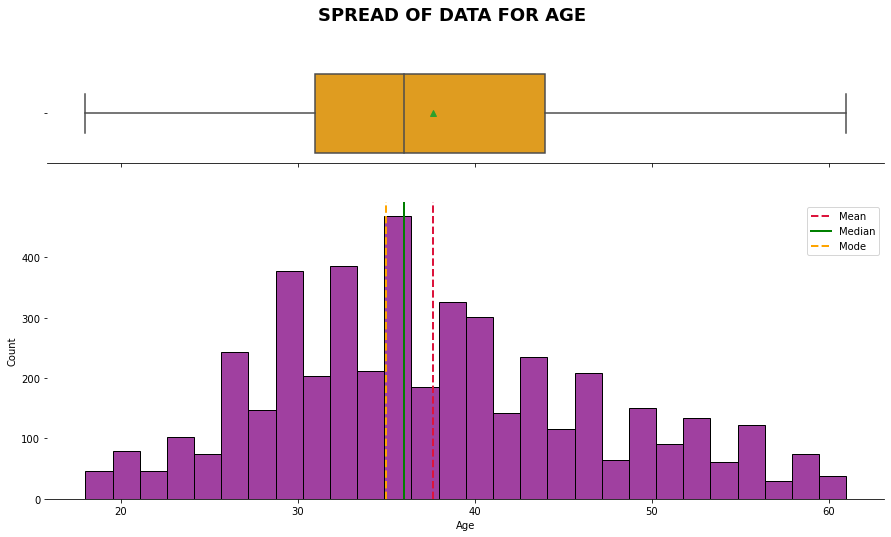

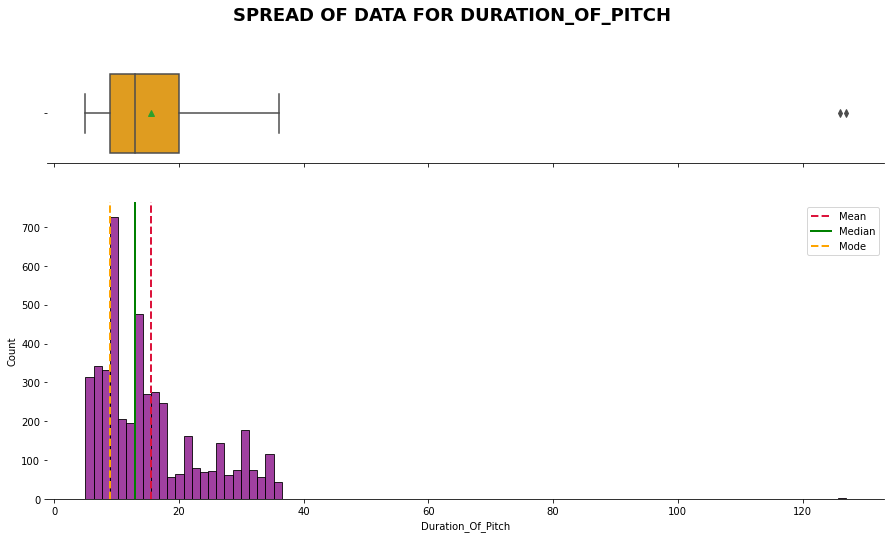

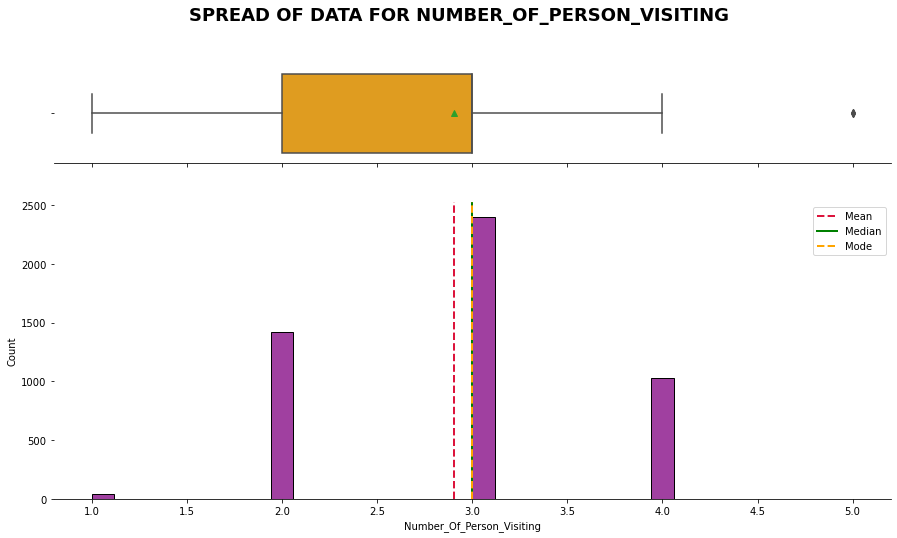

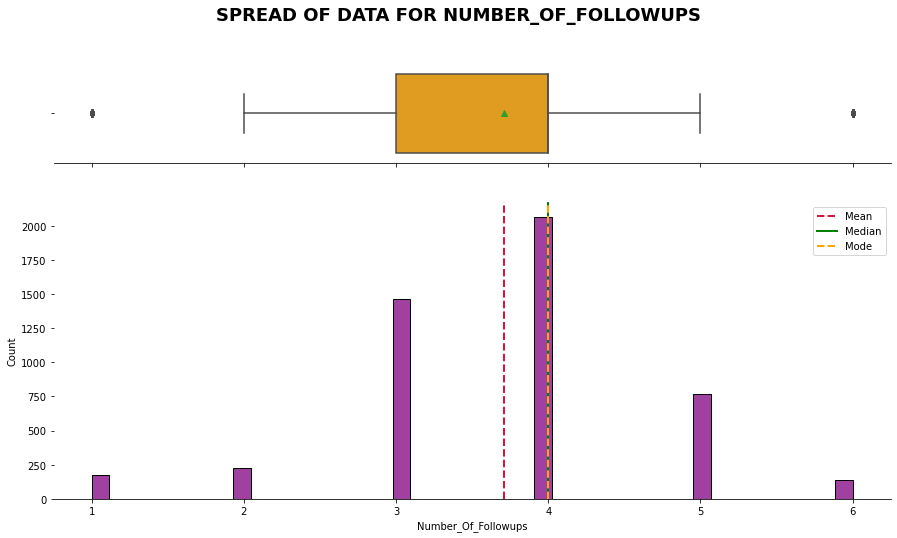

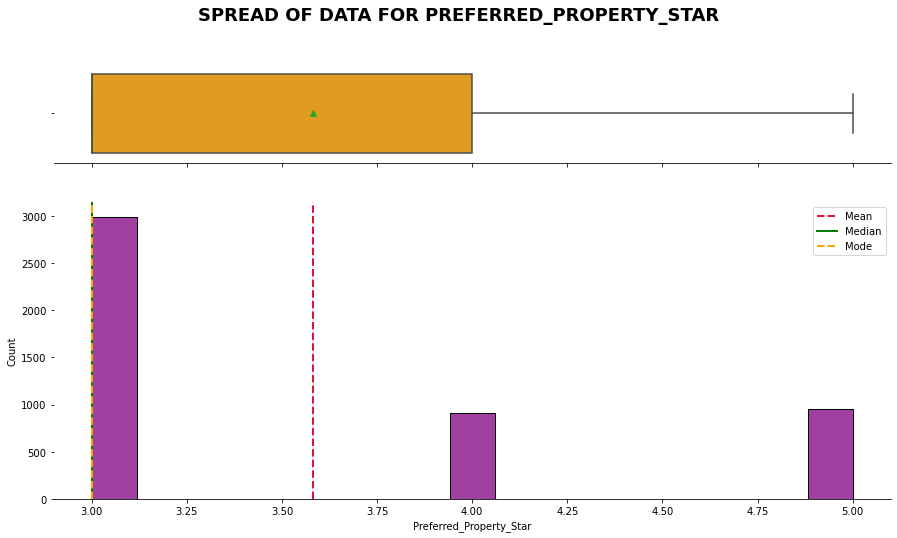

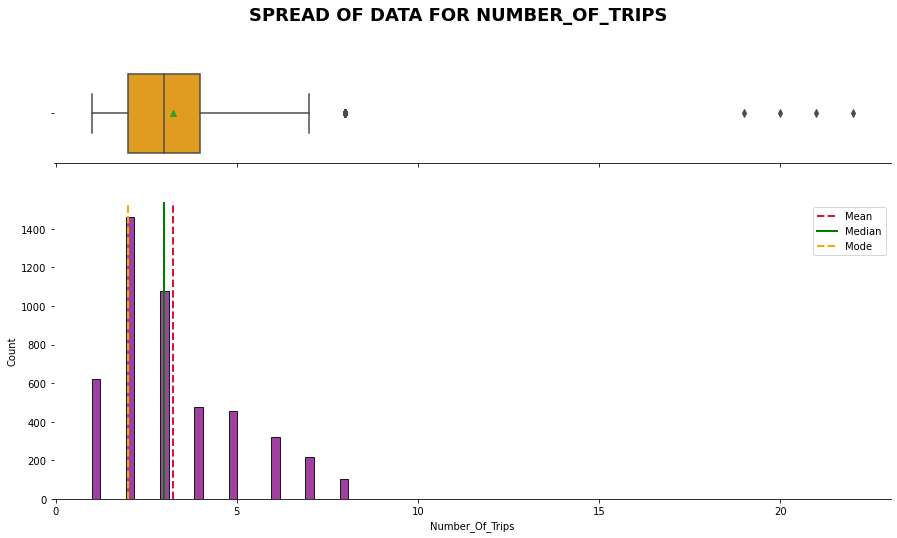

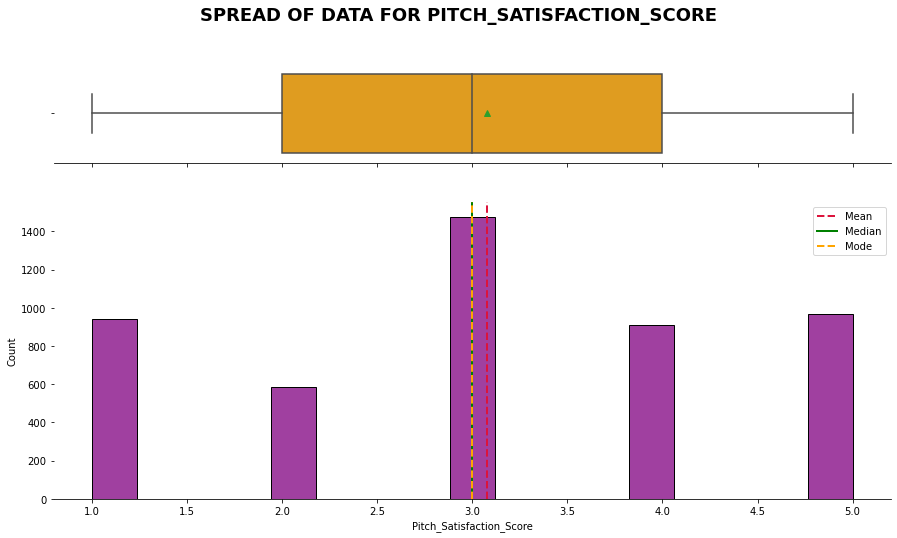

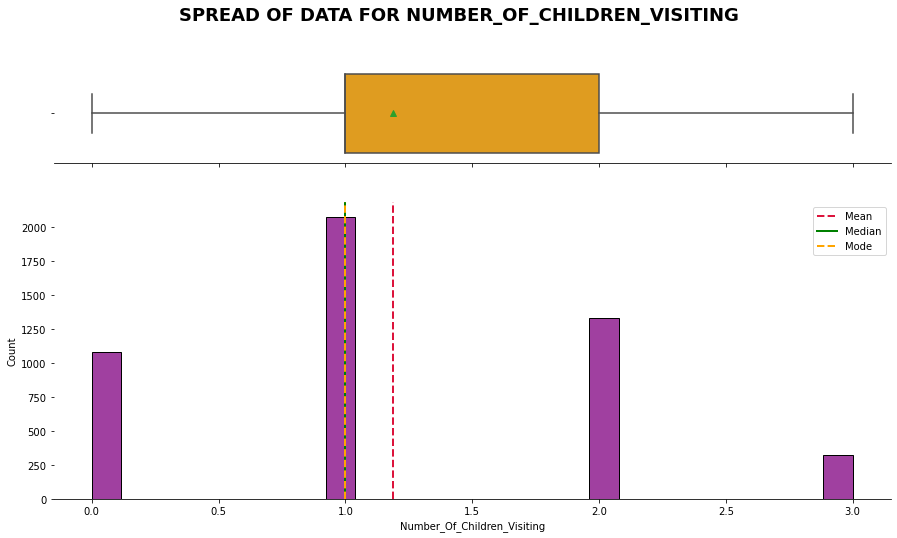

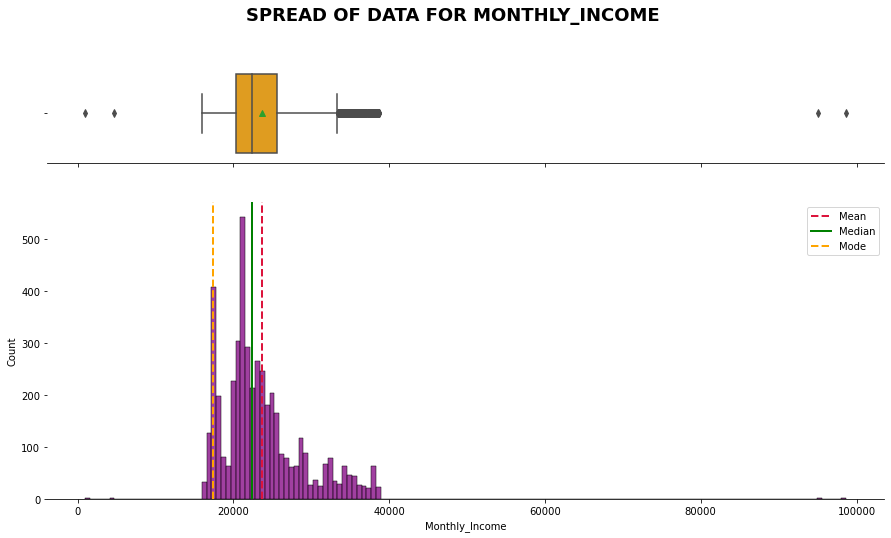

In [27]:
# select all quantitative columns for checking the spread

num_cols = df1.select_dtypes([np.number]).columns.to_list()

for x in num_cols:
    hist_box(df1[x])

In [28]:
# Observations

# Age is normally distrubted and doesn't have any outliers
# Duration of pitch is Right skewed with some outliers greater than 120 .Need to see if this are to be treated.
# Number of visitors is usually 3 with a outlier of 5.
# Average number of folows up are 4 with extreme of 6
# Number of trips is right skewed with some outliers where trips are greater than 17.
# Monthly income is Right skewed. and has some outlier as higher end.

In [29]:
# Listing all the categorical columns ---------------------

cat_cols = ['Prod_Taken', 'Age_bin', 'Type_of_Contact', 'City_Tier', 'Occupation', 'Gender',
            'Number_Of_Person_Visiting', 'Number_Of_Followups', 'Product_Pitched', 'Preferred_Property_Star',
            'Marital_Status', 'Number_Of_Trips', 'Passport', 'Pitch_Satisfaction_Score', 'Own_Car',
            'Number_Of_Children_Visiting', 'Designation', 'Income_bin']

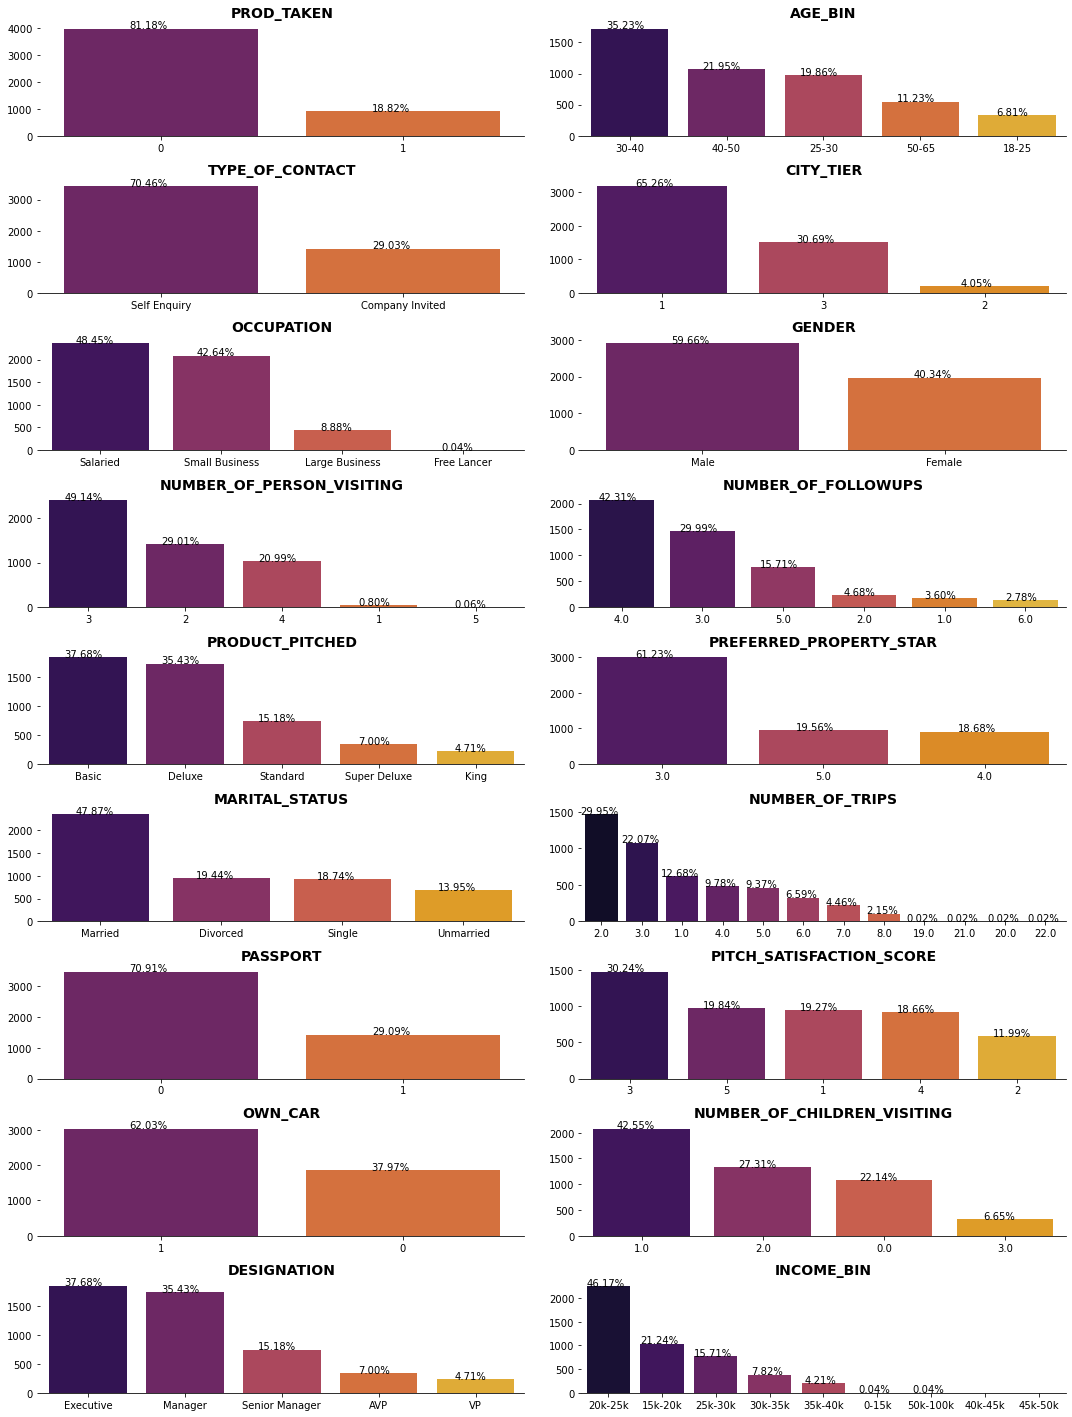

In [30]:
plt.figure(figsize=(15,20))    

for i in range(len(cat_cols)):
    plt.subplot(9,2,i+1)
    order = df1[cat_cols[i]].value_counts(ascending=False).index
    ax=sns.countplot(x=df1[cat_cols[i]], data=df1, order = order, palette='inferno' )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    bar_perc(ax, df1[cat_cols[i]])
    plt.tight_layout()
    plt.xlabel('')
    plt.ylabel('')
    plt.title(cat_cols[i].upper(), {'fontsize': 14, 'fontweight': 'bold'})                   

In [31]:
# Observations -----------------------------------------------------------------

# ~38 % customers are Executive, followed by 35% are managers.
# ~18% customers accepted product offered last time.
# ~ 62 % customer own car.
# ~29 % customers has a passport.
# ~ 65 % customers are from Tier 1 cities.
# ~ 61 % customers prefer 3 star property.
# ~ 48 % customers are married
# Basic package was pitched to ~ 38 % of customers and 35 % were pitched Deluxe package.
# 60 % customers are male.
# Occupation of ~ 49 % customer is salaried.
# 70.5 % customer self enquiried for the packages.
# Most of the customers travelled along with 3 people.
# Most of the customers take 2 trips per year but as seen previously there are some extreme values like 22.
# Most of the customers travelled with only one child.
# Most of the customers were followed up 4 times.
# Majority of customer monthly income is in 20,000-25,000 range.Most customer fall in overall 15,000-30,000 monthly income range.
# ~35% are in 30-40 years Age group. Most customer lie in overall 25-50 age range.

### Bivariate and Multivariate Analysis

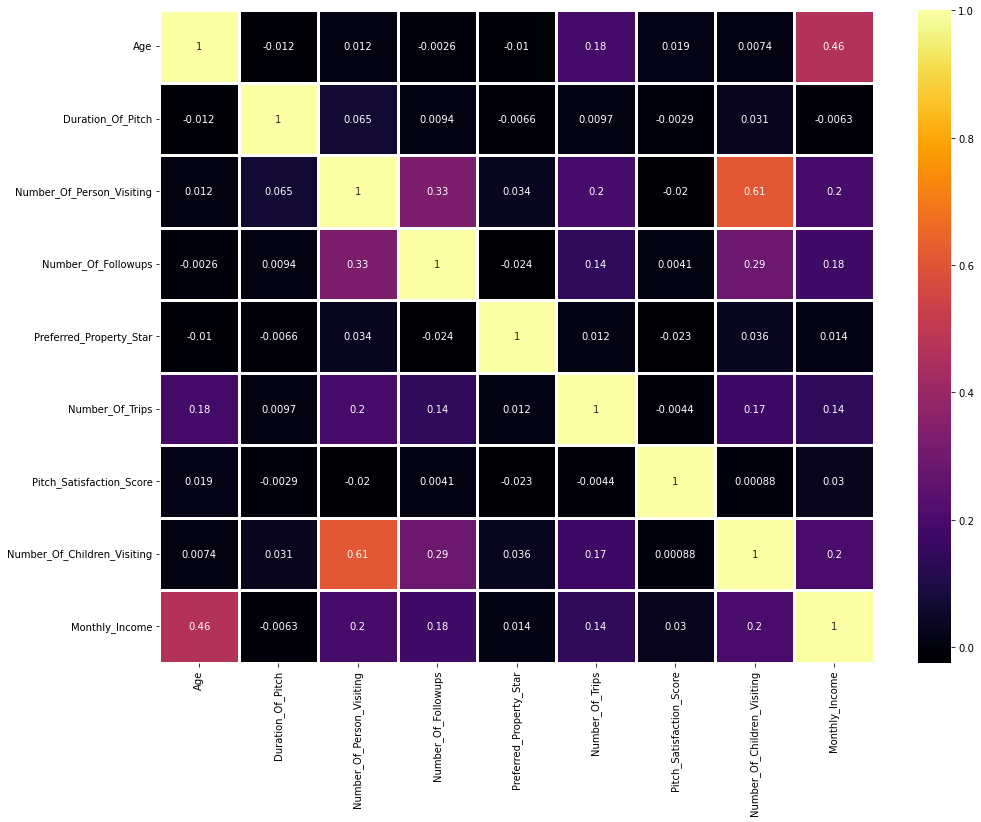

In [32]:
plt.figure(figsize = (16,12))

corr = df1.corr()
sns.heatmap(data=corr, cmap='inferno', annot=True, linewidths=3, cbar=True)
plt.show()

In [33]:
# Observations --------------------------------------------

# Monthlyincome and Age has some correlation.
# Number of children visiting and number of person vsiting has correlation as expected.
# Numberof follow up and number of person vsiting has very weak correlation.

In [34]:
# Function to plot distributions and Boxplots of customers -------------------------------------

def plot(x, target='Prod_Taken'):
    
    fig, axs = plt.subplots(2,2,figsize=(15,12))
    
    axs[0,0].set_title(f'Distribution of {x} \n of a Customer who had not taken product', fontsize=12, fontweight='bold')
    sns.histplot(df1[df1[target]==0][x], ax=axs[0,0], color='teal', kde=True)
    
    axs[0,1].set_title(f'Distribution of {x} \n of a Customer who had taken product', fontsize=12, fontweight='bold')
    sns.histplot(df1[df1[target]==1][x], ax=axs[0,1], color='orange', kde=True)
    
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken', fontsize=12, fontweight='bold')
    
    line = plt.Line2D((.1,.9), (.5,.5), color='grey', linewidth=2, linestyle='--')
    fig.add_artist(line)
    
    sns.boxplot(df1[target], df1[x], ax=axs[1,0], palette='inferno',showmeans=True, orient='v')
    
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers', fontsize=12, fontweight='bold')
    sns.boxplot(df1[target], df1[x], ax=axs[1,1], palette='inferno',showmeans=True, showfliers=False, orient='v')
    
    # turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

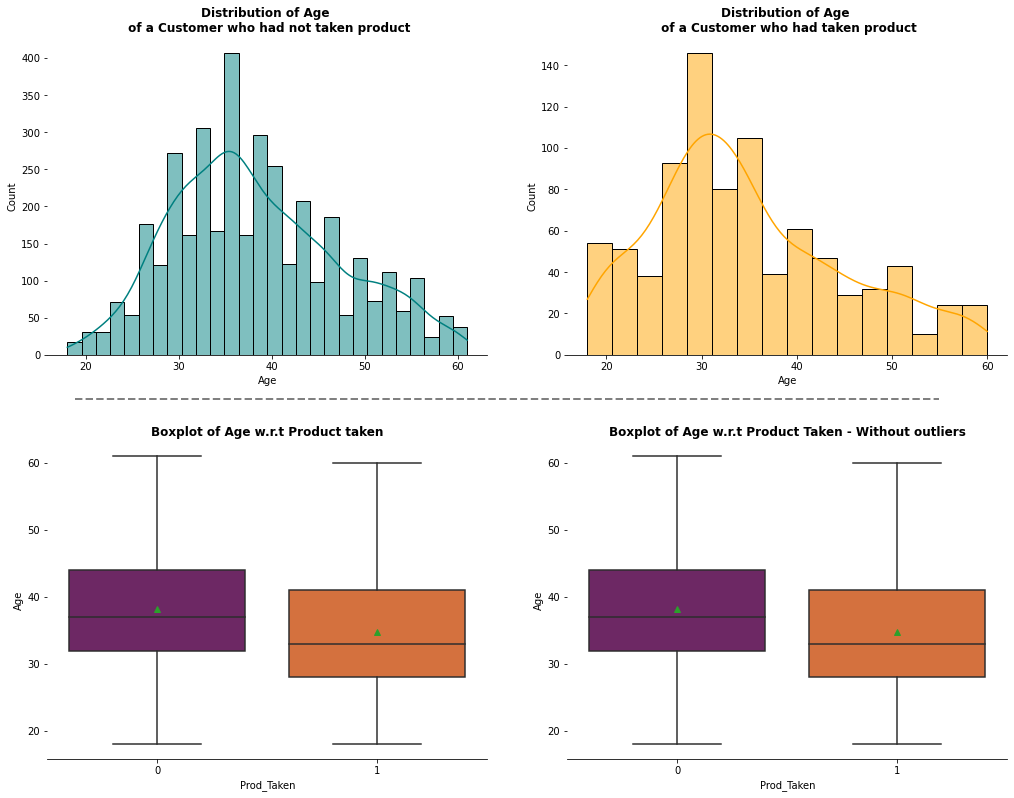

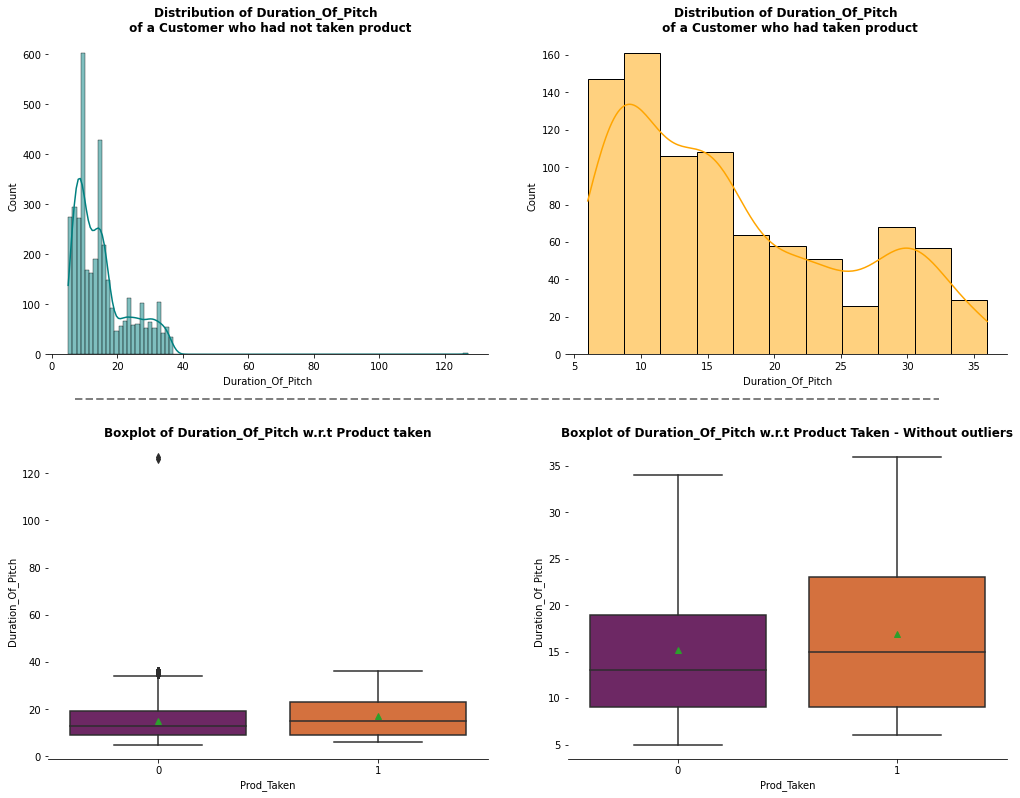

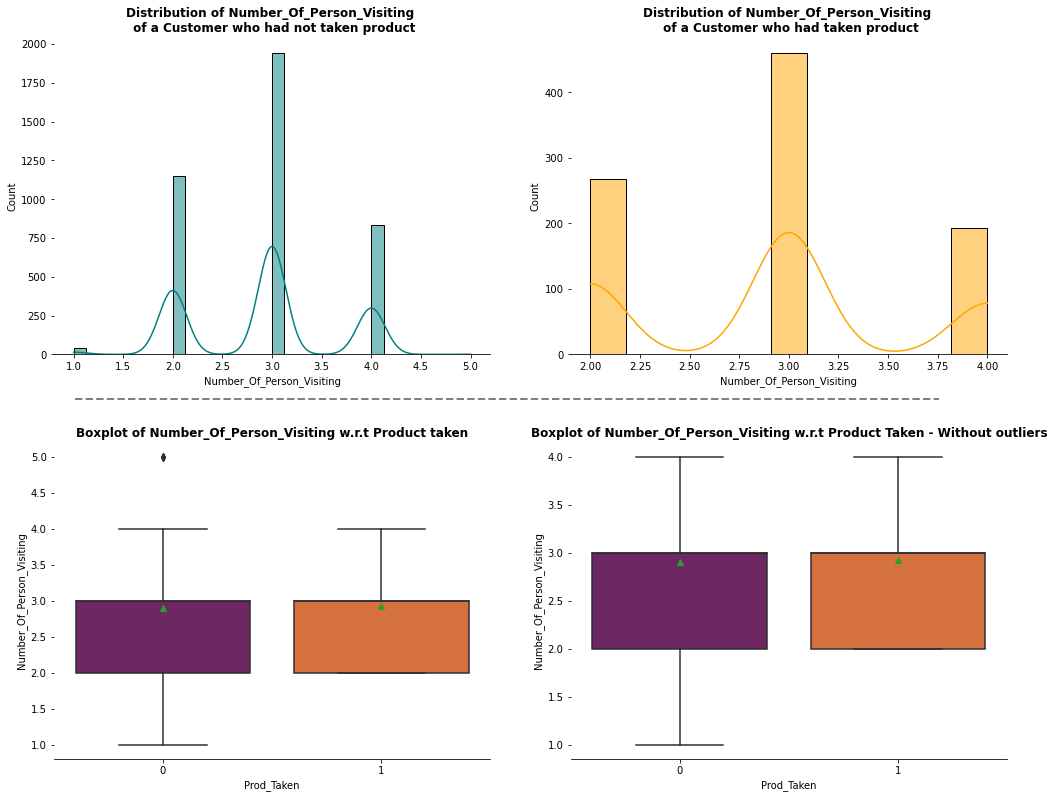

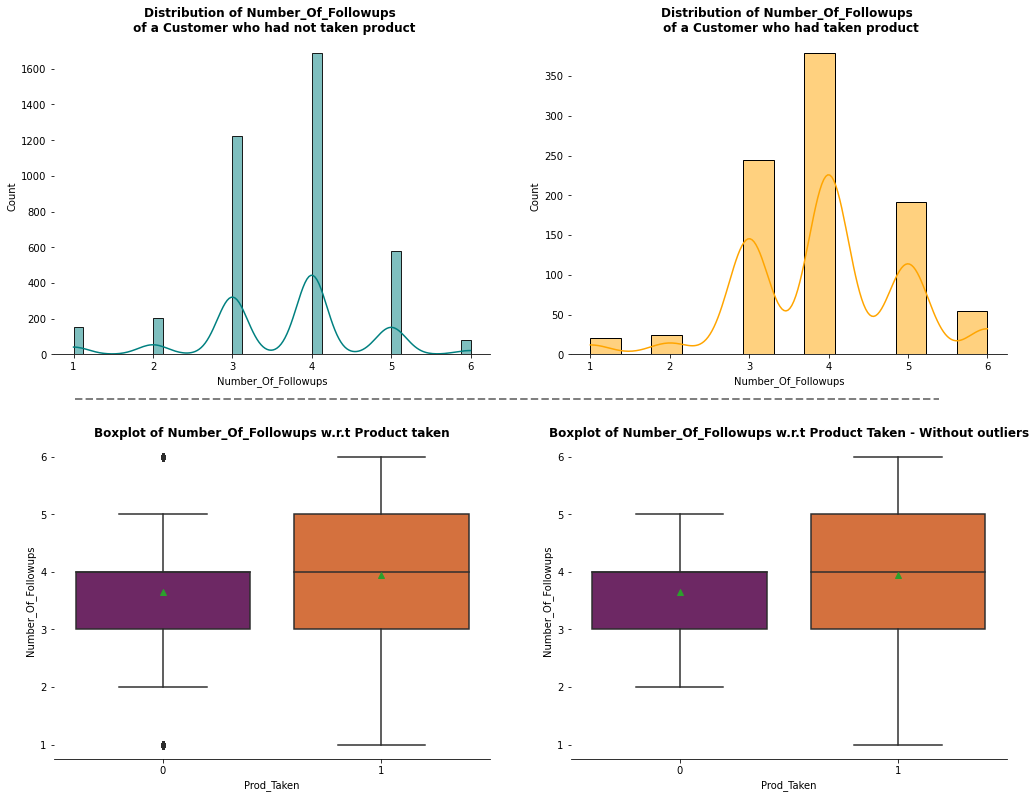

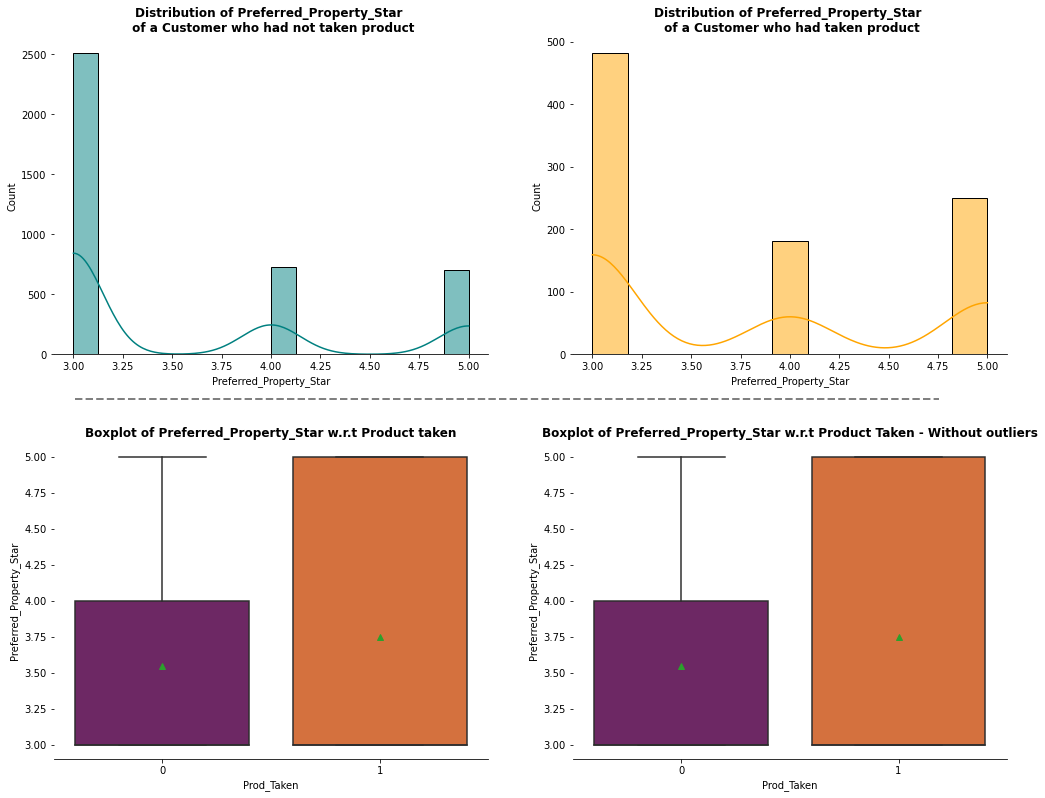

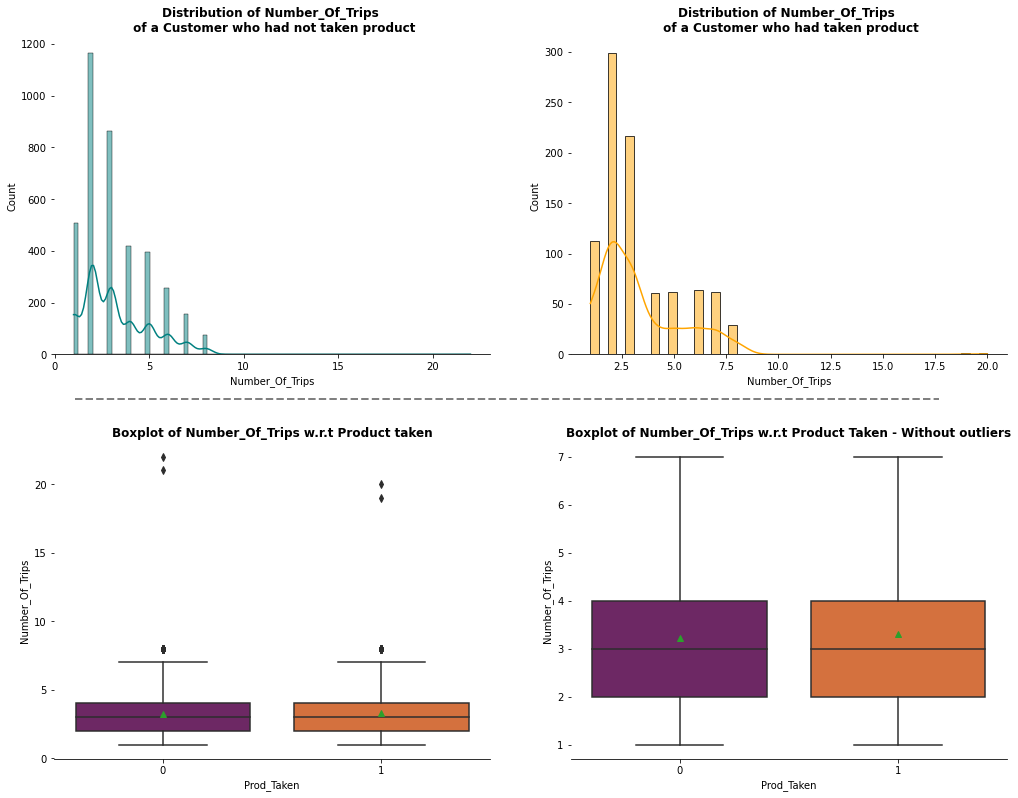

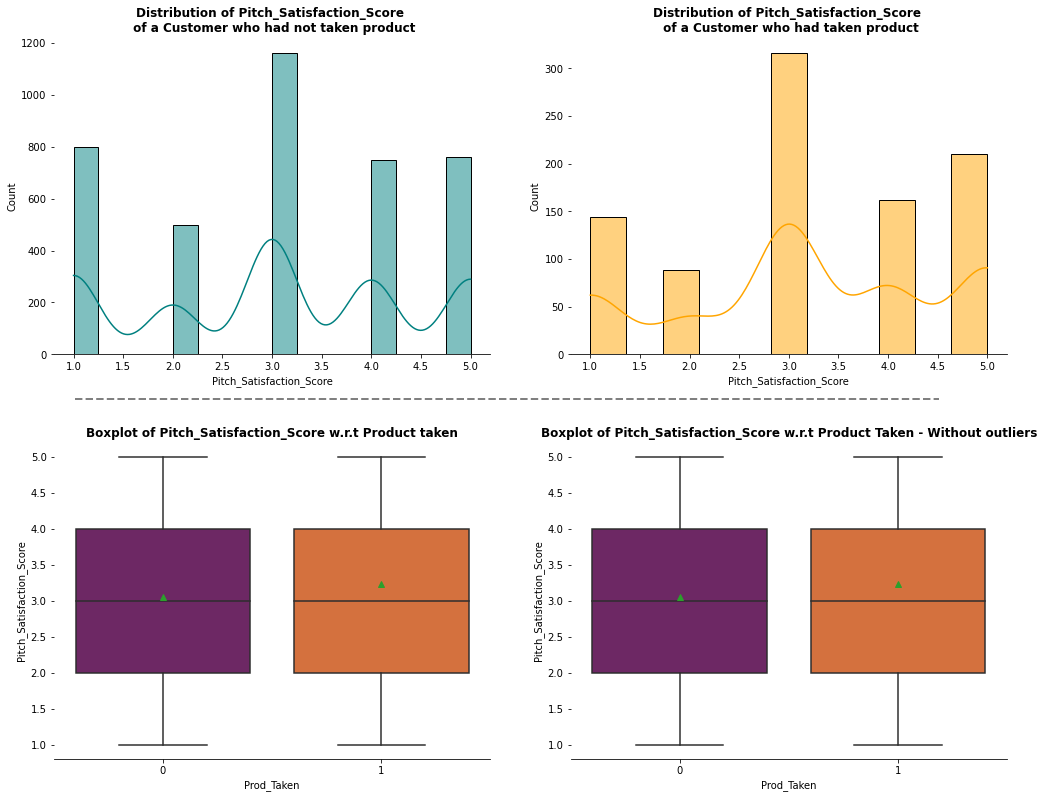

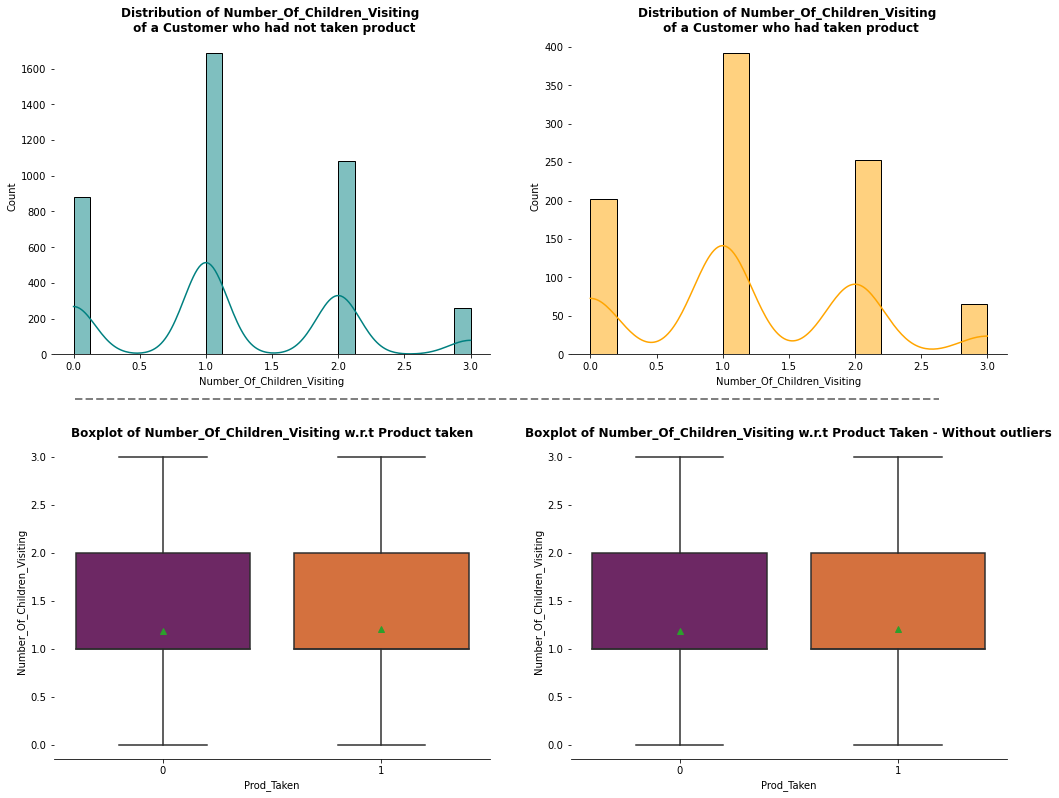

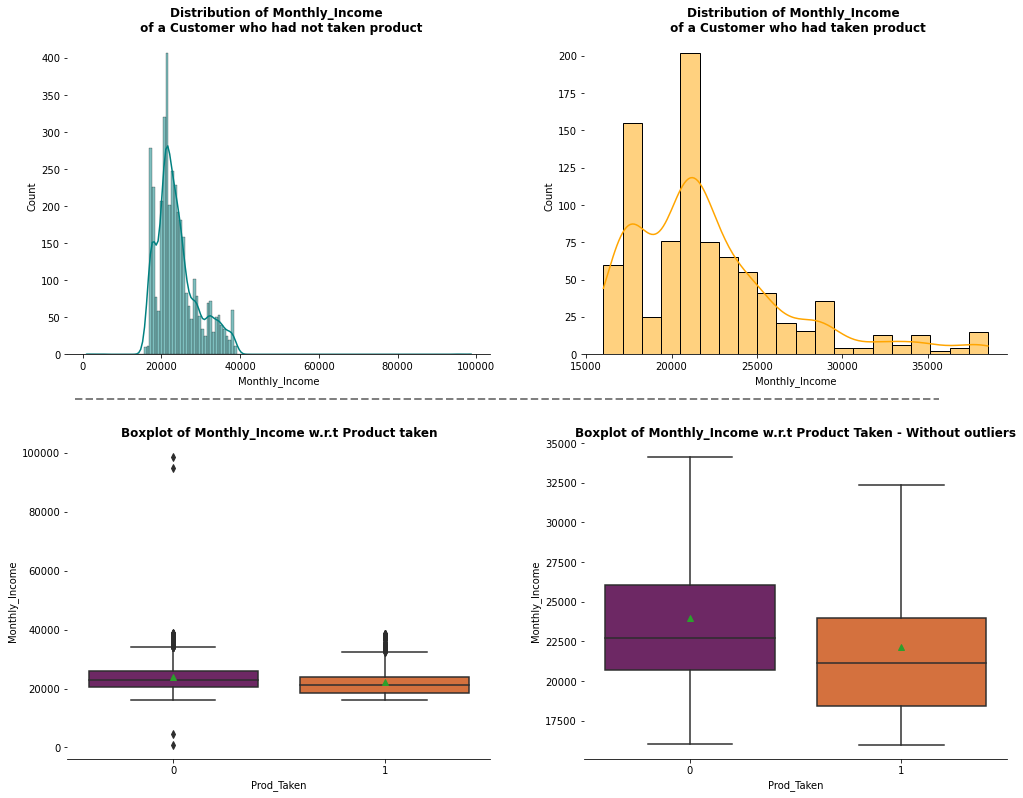

In [35]:
# select all quantitative columns for checking the spread
# num_cols =  ['Age','DurationOfPitch','MonthlyIncome']

num_cols = df1.select_dtypes([np.number]).columns.to_list()

for j in range(len(num_cols)):
    plot(num_cols[j])

In [36]:
# Observation ----------------------------------------------------

# Customers who purchased the product are mostly in age range of 28 -35.
# Duration of pitch suprisingly for customer who purchased product where 10- 40 min. There are some outliers in 
# duration of pitch for customers who didn't take the product.
# Number of trips has some outliers like 17 -20.
# Monthly income has extreme outliers. Customers who purchased product are in earning on average 18000-23000 monthly.

Text(0.5, 1.0, 'Monthly Income vs Occupation')

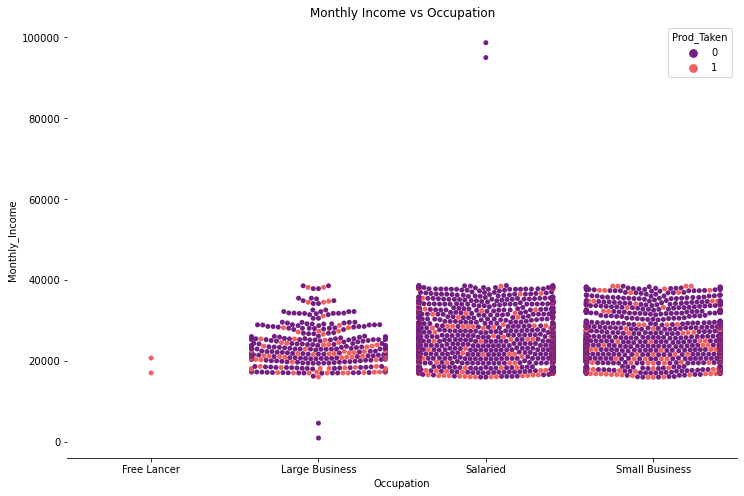

In [37]:
plt.figure(figsize = (12,8))

sns.swarmplot(y='Monthly_Income',x='Occupation',hue='Prod_Taken',data=df1, palette='magma')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

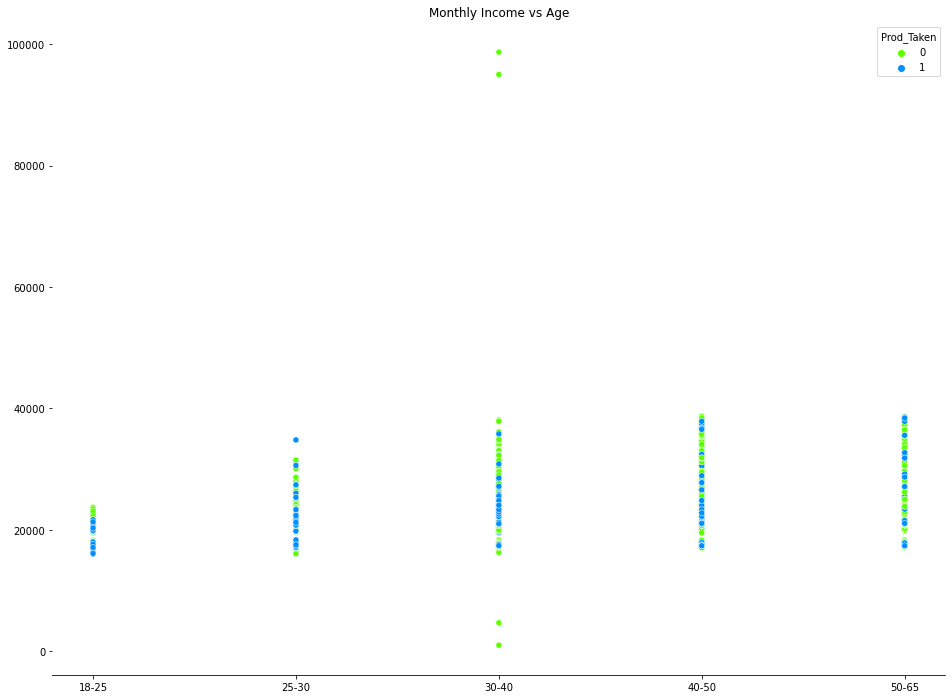

In [38]:
plt.figure(figsize = (16,12))

sns.scatterplot(x='Age_bin', y='Monthly_Income', hue='Prod_Taken', data=df1, palette='gist_rainbow')
sns.despine(top=True, left=True, right=True)
plt.title('Monthly Income vs Age')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Missing value Detection and Treatment

In [39]:
df1.isnull().sum()

Prod_Taken                       0
Age                            226
Age_bin                        240
Type_of_Contact                 25
City_Tier                        0
Duration_Of_Pitch              251
Occupation                       0
Gender                           0
Number_Of_Person_Visiting        0
Number_Of_Followups             45
Product_Pitched                  0
Preferred_Property_Star         26
Marital_Status                   0
Number_Of_Trips                140
Passport                         0
Pitch_Satisfaction_Score         0
Own_Car                          0
Number_Of_Children_Visiting     66
Designation                      0
Monthly_Income                 233
Income_bin                     233
dtype: int64

In [40]:
# Missing value Treatment Type of contact ---------------------------

df1['Type_of_Contact'].value_counts(ascending=False)

Self Enquiry       3444
Company Invited    1419
Name: Type_of_Contact, dtype: int64

In [41]:
# Highest ocurring value is Self Inquiry. We will impute the missing value for Type_of_Contact using the mode
# (highest occuring value) of the feature.

df1['Type_of_Contact'].mode()[0]
df1['Type_of_Contact'] = df1['Type_of_Contact'].fillna('Self Enquiry')

In [42]:
df1['Type_of_Contact'].isnull().sum()

0

In [43]:
# Missing value Treatment number of followup ------------------------------

df1.groupby(["Gender",'Product_Pitched'])["Number_Of_Followups"].median()

Gender  Product_Pitched
Female  Basic              4.0
        Deluxe             4.0
        King               4.0
        Standard           4.0
        Super Deluxe       4.0
Male    Basic              4.0
        Deluxe             4.0
        King               4.0
        Standard           4.0
        Super Deluxe       4.0
Name: Number_Of_Followups, dtype: float64

In [44]:
df1['Number_Of_Followups']=df1.groupby(["Gender",'Product_Pitched'])["Number_Of_Followups"].apply(lambda x:x.fillna(x.median()))

In [45]:
df1['Number_Of_Followups'].isnull().sum()

0

In [46]:
# Missing value Treatment Preferred_Property_Star ------------------------------------

#Look at few rows where values  is missing

df1[df1["Preferred_Property_Star"].isnull()]

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
38,0,36.0,30-40,Self Enquiry,1,11.0,Salaried,Female,2,4.0,...,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0,50k-100k
2609,0,51.0,50-65,Self Enquiry,1,18.0,Salaried,Female,3,4.0,...,NaN,Single,5.0,0,5,1,1.0,VP,38604.0,35k-40k
2634,0,53.0,50-65,Self Enquiry,1,7.0,Salaried,Male,4,5.0,...,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0,35k-40k
3012,1,56.0,50-65,Self Enquiry,1,9.0,Small Business,Male,4,4.0,...,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0,35k-40k
3190,0,42.0,40-50,Company Invited,1,14.0,Salaried,Female,3,6.0,...,NaN,Married,3.0,0,4,1,1.0,VP,38651.0,35k-40k
3193,1,53.0,50-65,Self Enquiry,3,9.0,Small Business,Female,3,6.0,...,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0,35k-40k
3214,0,47.0,40-50,Self Enquiry,1,7.0,Small Business,Male,3,4.0,...,NaN,Married,2.0,0,5,1,2.0,VP,38305.0,35k-40k
3295,0,57.0,50-65,Self Enquiry,1,11.0,Large Business,Female,4,4.0,...,NaN,Married,6.0,0,4,0,3.0,VP,38621.0,35k-40k
3342,0,44.0,40-50,Self Enquiry,1,10.0,Salaried,Male,4,6.0,...,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0,35k-40k
3362,0,52.0,50-65,Company Invited,3,16.0,Salaried,Male,3,4.0,...,NaN,Married,6.0,1,4,1,2.0,VP,38525.0,35k-40k


In [47]:
df1.groupby(["Designation"])["Preferred_Property_Star"].median()

Designation
AVP               3.0
Executive         3.0
Manager           3.0
Senior Manager    3.0
VP                3.0
Name: Preferred_Property_Star, dtype: float64

In [48]:
# Let see how can impute PreferredPropertyStar using designation of customer for more granularity

df1['Preferred_Property_Star']=df1.groupby(["Designation"])["Preferred_Property_Star"].apply(lambda x:x.fillna(x.median()))

In [49]:
df1['Preferred_Property_Star'].isnull().sum()

0

In [50]:
# Missing value Treatment Duration of pitch -----------------------------------------

# Let see how can we impute Duration of pitch.In my opinion, an important factor for how long sale person 
# take times to market his sales pitch depends on Product which sale person is proposing , number of followup 
# will also decide duration of pitch. Let verify this.

In [51]:
df1.groupby(['Product_Pitched','Number_Of_Followups'])["Duration_Of_Pitch"].median()

Product_Pitched  Number_Of_Followups
Basic            1.0                    14.0
                 2.0                    15.0
                 3.0                    13.0
                 4.0                    13.0
                 5.0                    12.0
                 6.0                    15.5
Deluxe           1.0                    11.5
                 2.0                    13.0
                 3.0                    14.0
                 4.0                    14.0
                 5.0                    13.0
                 6.0                    13.0
King             1.0                    15.0
                 2.0                    15.5
                 3.0                    10.0
                 4.0                    11.0
                 5.0                    10.0
                 6.0                     9.0
Standard         1.0                    14.0
                 2.0                    15.0
                 3.0                    14.0
                 4

In [52]:
df1.groupby(['Product_Pitched','Number_Of_Followups'], as_index=False)["Duration_Of_Pitch"].median()

,Product_Pitched,Number_Of_Followups,Duration_Of_Pitch
0,Basic,1.0,14.0
1,Basic,2.0,15.0
2,Basic,3.0,13.0
3,Basic,4.0,13.0
4,Basic,5.0,12.0
5,Basic,6.0,15.5
6,Deluxe,1.0,11.5
7,Deluxe,2.0,13.0
8,Deluxe,3.0,14.0
9,Deluxe,4.0,14.0


In [53]:
# Impute missing Duration of pitch with median value ----------------

df1["Duration_Of_Pitch"]=df1.groupby(['Product_Pitched','Number_Of_Followups'])["Duration_Of_Pitch"].apply(
    lambda x:x.fillna(x.median()))

In [54]:
df1["Duration_Of_Pitch"].isnull().sum()

0

In [55]:
df1.isnull().sum()

Prod_Taken                       0
Age                            226
Age_bin                        240
Type_of_Contact                  0
City_Tier                        0
Duration_Of_Pitch                0
Occupation                       0
Gender                           0
Number_Of_Person_Visiting        0
Number_Of_Followups              0
Product_Pitched                  0
Preferred_Property_Star          0
Marital_Status                   0
Number_Of_Trips                140
Passport                         0
Pitch_Satisfaction_Score         0
Own_Car                          0
Number_Of_Children_Visiting     66
Designation                      0
Monthly_Income                 233
Income_bin                     233
dtype: int64

In [56]:
# Missing value Treatment for NumberOfTrips ----------------------------------------

df1.groupby(['Marital_Status'])["Number_Of_Trips"].median()

Marital_Status
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: Number_Of_Trips, dtype: float64

In [57]:
# For more granularity imputing number of trips using martial status

df1['Number_Of_Trips'] = df1.groupby(['Marital_Status'])["Number_Of_Trips"].apply(lambda x : x.fillna(x.median()))
df1.Number_Of_Trips.isnull().sum()

0

In [58]:
# Missing value Treatment NumberOfChildrenVisiting-------------------------------------------

df1[df1["Number_Of_Children_Visiting"].isnull()].head(10)

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
165,0,50.0,40-50,Self Enquiry,1,17.0,Salaried,Female,2,3.0,...,4.0,Single,4.0,0,5,1,NaN,VP,34926.0,30k-35k
190,0,52.0,50-65,Self Enquiry,1,6.0,Salaried,Male,3,4.0,...,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0,30k-35k
568,1,55.0,50-65,Self Enquiry,1,8.0,Small Business,Male,3,3.0,...,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0,30k-35k
746,0,41.0,40-50,Company Invited,1,13.0,Salaried,Female,2,5.0,...,3.0,Married,2.0,0,4,1,NaN,VP,34973.0,30k-35k
749,1,52.0,50-65,Self Enquiry,3,8.0,Small Business,Female,2,5.0,...,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0,30k-35k
851,0,56.0,50-65,Self Enquiry,1,10.0,Large Business,Female,3,3.0,...,5.0,Married,5.0,0,4,0,NaN,VP,34943.0,30k-35k
898,0,43.0,40-50,Self Enquiry,1,9.0,Salaried,Male,3,5.0,...,3.0,Divorced,4.0,0,5,1,NaN,VP,34740.0,30k-35k
918,0,51.0,50-65,Company Invited,3,15.0,Salaried,Male,2,3.0,...,4.0,Married,5.0,1,4,1,NaN,VP,34847.0,30k-35k
956,0,56.0,50-65,Self Enquiry,2,14.0,Salaried,Male,2,3.0,...,4.0,Single,7.0,0,4,1,NaN,VP,34717.0,30k-35k
1009,0,58.0,50-65,Self Enquiry,1,6.0,Small Business,Female,3,3.0,...,5.0,Divorced,4.0,1,1,1,NaN,VP,34701.0,30k-35k


In [59]:
# Assuming children visited is missing because no children accompanied these customers 
# so we will fill the missing values with 0

# Impute missing NumberOfChildrenVisited with 0

df1['Number_Of_Children_Visiting']=df1['Number_Of_Children_Visiting'].fillna(0)
df1['Number_Of_Children_Visiting'].isnull().sum()

0

In [60]:
# Missing value Treatment Age ---------------------------------------------------

# Imputing age using designation, gender, Martial status would give more granularity.

df1.groupby(["Designation", "Gender", "Marital_Status"])["Age"].median()

Designation     Gender  Marital_Status
AVP             Female  Divorced          47.0
                        Married           48.0
                        Single            53.0
                        Unmarried         40.0
                Male    Divorced          49.5
                        Married           50.0
                        Single            48.0
                        Unmarried         39.0
Executive       Female  Divorced          34.0
                        Married           33.0
                        Single            30.0
                        Unmarried         33.0
                Male    Divorced          32.0
                        Married           32.0
                        Single            30.0
                        Unmarried         32.0
Manager         Female  Divorced          36.0
                        Married           38.0
                        Single            35.5
                        Unmarried         36.0
                Male 

In [61]:
# Impute missing Age with median value
# NaN value in median indicates that there is no data point in our dataset which satisfies all these conditions.

df1["Age"] = df1.groupby(["Designation", "Gender", "Marital_Status"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

df1.Age.isnull().sum()

0

In [62]:
# Missing value Treatment MonthlyIncome -------------------------------

# For more granularity imputing on occupation, Designation, Gender

df1.groupby(["Occupation",'Designation','Gender'])["Monthly_Income"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female        NaN
                                Male          NaN
                Executive       Female        NaN
                                Male      18929.0
                Manager         Female        NaN
                                Male          NaN
                Senior Manager  Female        NaN
                                Male          NaN
                VP              Female        NaN
                                Male          NaN
Large Business  AVP             Female    31872.0
                                Male      29959.0
                Executive       Female    20748.0
                                Male      20743.5
                Manager         Female    22198.5
                                Male      21997.0
                Senior Manager  Female    28266.0
                                Male      26838.5
                VP              Female    36583.0
           

In [63]:
df1["Monthly_Income"]=df1.groupby(["Occupation",'Designation','Gender'])["Monthly_Income"].apply(
    lambda x: x.fillna(x.median())
)

df1["Monthly_Income"].isnull().sum()

0

In [64]:
df1.isnull().sum()

Prod_Taken                       0
Age                              0
Age_bin                        240
Type_of_Contact                  0
City_Tier                        0
Duration_Of_Pitch                0
Occupation                       0
Gender                           0
Number_Of_Person_Visiting        0
Number_Of_Followups              0
Product_Pitched                  0
Preferred_Property_Star          0
Marital_Status                   0
Number_Of_Trips                  0
Passport                         0
Pitch_Satisfaction_Score         0
Own_Car                          0
Number_Of_Children_Visiting      0
Designation                      0
Monthly_Income                   0
Income_bin                     233
dtype: int64

In [65]:
# Creating Age bins ---------------------------

df1.Age.describe()

count    4888.000000
mean       37.413564
std         9.162798
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [66]:
df1['Age_bin'] = pd.cut(df1['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','25-30', '30-40', '40-50', '50-70'])

df1.Age_bin.value_counts()

30-40    1894
40-50    1073
25-30    1025
50-70     549
15-25     347
Name: Age_bin, dtype: int64

In [67]:
# Creating Income_bin ---------------------------

df1.Monthly_Income.describe()

count     4888.000000
mean     23543.855769
std       5267.651455
min       1000.000000
25%      20438.250000
50%      22393.000000
75%      25424.750000
max      98678.000000
Name: Monthly_Income, dtype: float64

In [68]:
df1['Income_bin'] = pd.cut(df1['Monthly_Income'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], 
           labels = ['0-15k', '15k-20k', '20k-25k', '25k-30k','30k-35k','35k-40k','40k-45k','45k-50k','50k-100k'])

df1.Income_bin.value_counts()

20k-25k     2490
15k-20k     1038
25k-30k      768
30k-35k      382
35k-40k      206
0-15k          2
50k-100k       2
40k-45k        0
45k-50k        0
Name: Income_bin, dtype: int64

In [69]:
df1.isnull().sum()

Prod_Taken                     0
Age                            0
Age_bin                        0
Type_of_Contact                0
City_Tier                      0
Duration_Of_Pitch              0
Occupation                     0
Gender                         0
Number_Of_Person_Visiting      0
Number_Of_Followups            0
Product_Pitched                0
Preferred_Property_Star        0
Marital_Status                 0
Number_Of_Trips                0
Passport                       0
Pitch_Satisfaction_Score       0
Own_Car                        0
Number_Of_Children_Visiting    0
Designation                    0
Monthly_Income                 0
Income_bin                     0
dtype: int64

## Customer Profile by Product Type

In [70]:
cust_prof = df1[df1.Prod_Taken==1]

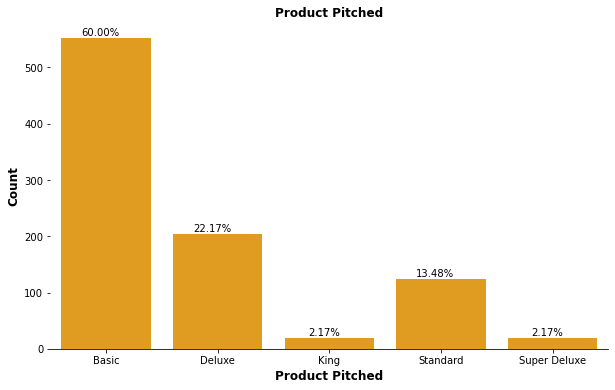

In [111]:
plt.figure(figsize=(10,6))

ax=sns.countplot(x='Product_Pitched', data=cust_prof, color='orange')
bar_perc(ax, cust_prof.Product_Pitched)
sns.despine(top=True, right=True, left=True)
plt.xlabel('Product Pitched', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

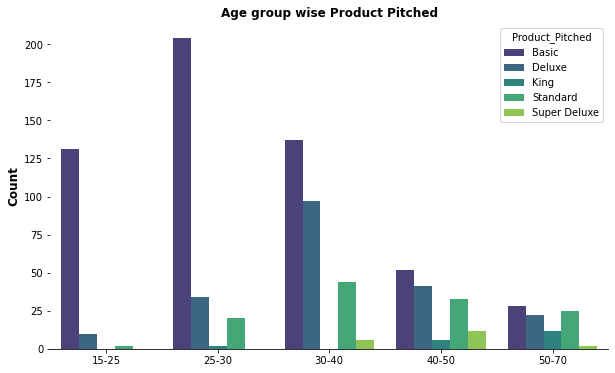

In [72]:
plt.figure(figsize=(10,6))

sns.countplot(x='Age_bin',hue='Product_Pitched', data=cust_prof, palette='viridis')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Age group wise Product Pitched', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

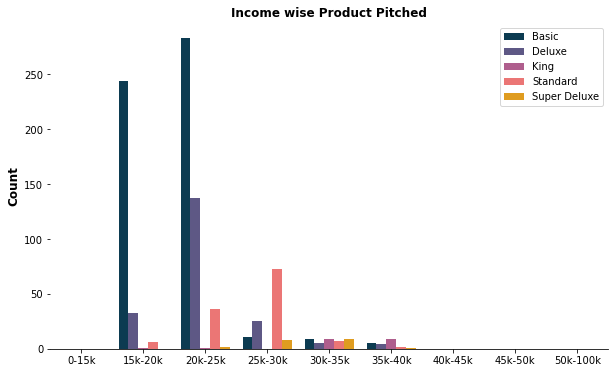

In [73]:
plt.figure(figsize=(10,6))
new = ["#003f5c", "#58508d", "#bc5090", '#ff6361', '#ffa600']
sns.set_palette(new)

sns.countplot(x='Income_bin',hue='Product_Pitched', data=cust_prof)
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Income wise Product Pitched', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='upper right')
plt.show()

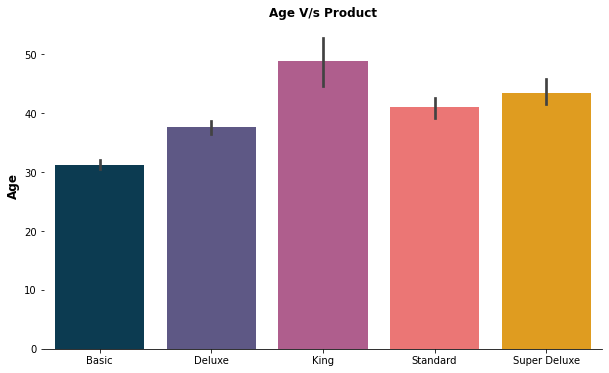

In [74]:
plt.figure(figsize=(10,6))

sns.barplot(y='Age',x='Product_Pitched',data=cust_prof)
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Age', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Age V/s Product', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

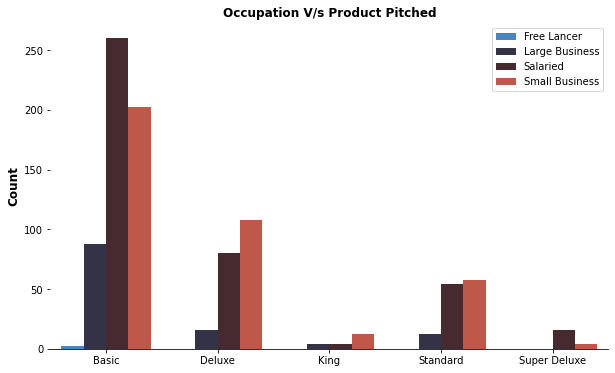

In [75]:
plt.figure(figsize=(10,6))

sns.countplot(x="Product_Pitched", data=cust_prof,  hue="Occupation", palette='icefire')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Occupation V/s Product Pitched', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='upper right')
plt.show()

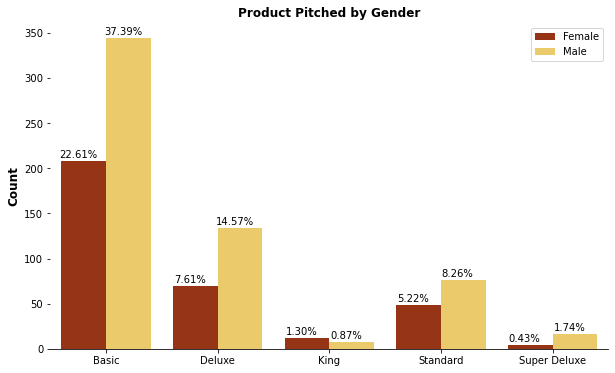

In [76]:
plt.figure(figsize=(10,6))

ax=sns.countplot(x="Product_Pitched", data=cust_prof,  hue="Gender", palette='afmhot')
bar_perc(ax, cust_prof.Gender)
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by Gender', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='upper right')
plt.show()

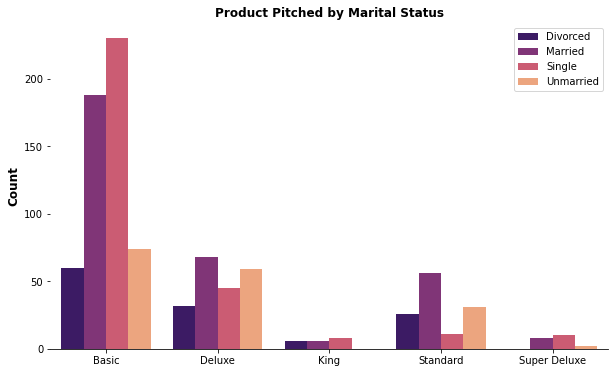

In [77]:
plt.figure(figsize=(10,6))

sns.countplot(x="Product_Pitched", data=cust_prof,  hue="Marital_Status", palette='magma')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by Marital Status', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='best')
plt.show()

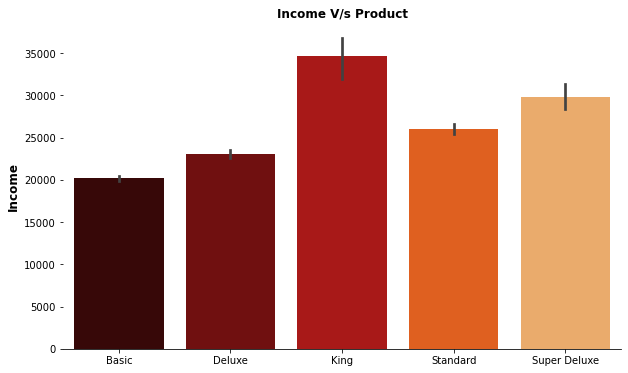

In [78]:
plt.figure(figsize=(10,6))

sns.barplot(y='Monthly_Income',x='Product_Pitched',data=cust_prof, palette='gist_heat')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Income', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Income V/s Product', {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

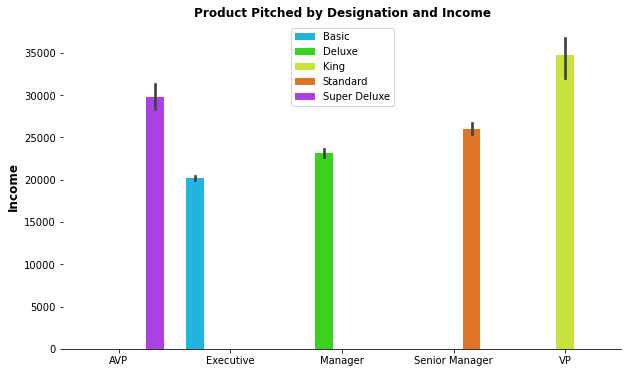

In [79]:
plt.figure(figsize=(10,6))

sns.barplot(x='Designation',y='Monthly_Income',data=cust_prof,hue='Product_Pitched', palette='gist_ncar')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Income', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by Designation and Income', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='best')
plt.show()

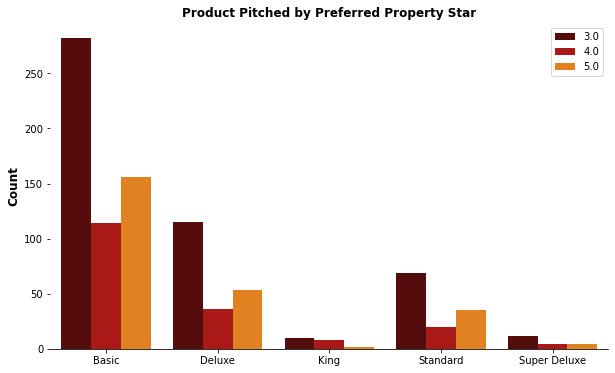

In [80]:
plt.figure(figsize=(10,6))

sns.countplot(x="Product_Pitched", data=cust_prof,  hue="Preferred_Property_Star", palette='gist_heat')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by Preferred Property Star', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='best')
plt.show()

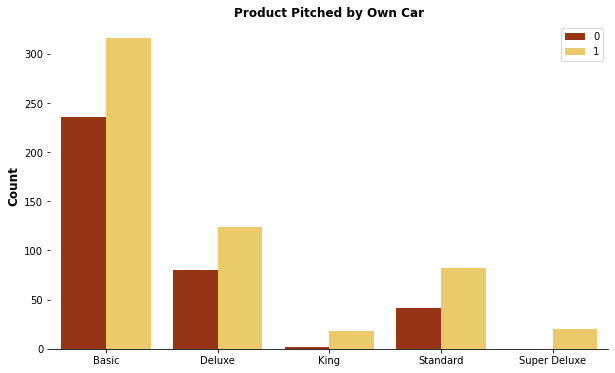

In [81]:
plt.figure(figsize=(10,6))

sns.countplot(x="Product_Pitched", data=cust_prof,  hue="Own_Car", palette='afmhot')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by Own Car', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='best')
plt.show()

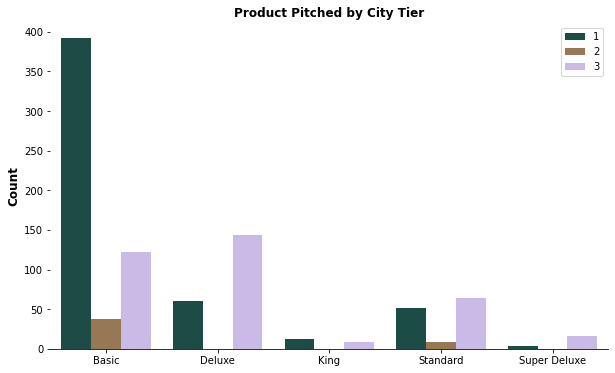

In [82]:
plt.figure(figsize=(10,6))

sns.countplot(x="Product_Pitched", data=cust_prof,  hue="City_Tier", palette='cubehelix')
sns.despine(top=True, right=True, left=True)
plt.xlabel('')
plt.ylabel('Count', {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Product Pitched by City Tier', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(loc='best')
plt.show()

In [83]:
cust_prof.groupby(['Product_Pitched']).agg({'Monthly_Income' : {'mean', 'min', 'max'}, 'Age' : {'mean', 'min', 'max'}})

Monthly_Income                          Age            
                          mean      max      min       mean   max   min
Product_Pitched                                                        
Basic             20179.108696  37868.0  16009.0  31.264493  59.0  18.0
Deluxe            23093.333333  38525.0  17086.0  37.590686  59.0  21.0
King              34672.100000  38537.0  17517.0  48.900000  59.0  27.0
Standard          26035.419355  38395.0  17372.0  40.991935  60.0  19.0
Super Deluxe      29823.800000  37502.0  21151.0  43.500000  56.0  39.0

In [84]:
cust_prof[cust_prof['Product_Pitched']=='Basic'].describe(include='all')

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
count,552.0,552.000000,552,552,552.0,552.000000,552,552,552.000000,552.000000,...,552.000000,552,552.000000,552.0,552.000000,552.0,552.000000,552,552.000000,552
unique,1.0,NaN,5,2,3.0,NaN,4,2,NaN,NaN,...,NaN,4,NaN,2.0,NaN,2.0,NaN,1,NaN,5
top,1.0,NaN,25-30,Self Enquiry,1.0,NaN,Salaried,Male,NaN,NaN,...,NaN,Single,NaN,1.0,NaN,1.0,NaN,Executive,NaN,20k-25k
freq,552.0,NaN,204,358,392.0,NaN,260,344,NaN,NaN,...,NaN,230,NaN,322.0,NaN,316.0,NaN,552,NaN,283
mean,NaN,31.264493,NaN,NaN,NaN,15.692935,NaN,NaN,2.905797,3.951087,...,3.771739,NaN,3.221014,NaN,3.213768,NaN,1.219203,NaN,20179.108696,NaN
std,NaN,8.765899,NaN,NaN,NaN,7.780240,NaN,NaN,0.701439,0.963658,...,0.861812,NaN,2.073529,NaN,1.353074,NaN,0.867310,NaN,3244.626630,NaN
min,NaN,18.000000,NaN,NaN,NaN,6.000000,NaN,NaN,2.000000,1.000000,...,3.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,16009.000000,NaN
25%,NaN,26.000000,NaN,NaN,NaN,9.000000,NaN,NaN,2.000000,3.000000,...,3.000000,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,17581.250000,NaN
50%,NaN,30.000000,NaN,NaN,NaN,14.000000,NaN,NaN,3.000000,4.000000,...,3.000000,NaN,3.000000,NaN,3.000000,NaN,1.000000,NaN,20582.000000,NaN
75%,NaN,34.000000,NaN,NaN,NaN,21.000000,NaN,NaN,3.000000,5.000000,...,5.000000,NaN,3.250000,NaN,4.000000,NaN,2.000000,NaN,21365.750000,NaN


In [85]:
cust_prof[cust_prof['Product_Pitched']=='Deluxe'].describe(include='all')

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
count,204.0,204.000000,204,204,204.0,204.000000,204,204,204.000000,204.000000,...,204.000000,204,204.000000,204.0,204.000000,204.0,204.000000,204,204.000000,204
unique,1.0,NaN,5,2,2.0,NaN,3,2,NaN,NaN,...,NaN,4,NaN,2.0,NaN,2.0,NaN,1,NaN,5
top,1.0,NaN,30-40,Self Enquiry,3.0,NaN,Small Business,Male,NaN,NaN,...,NaN,Married,NaN,0.0,NaN,1.0,NaN,Manager,NaN,20k-25k
freq,204.0,NaN,97,136,144.0,NaN,108,134,NaN,NaN,...,NaN,68,NaN,104.0,NaN,124.0,NaN,204,NaN,137
mean,NaN,37.590686,NaN,NaN,NaN,18.463235,NaN,NaN,2.950980,3.970588,...,3.696078,NaN,3.696078,NaN,3.039216,NaN,1.166667,NaN,23093.333333,NaN
std,NaN,8.350414,NaN,NaN,NaN,8.841649,NaN,NaN,0.707141,1.040613,...,0.857183,NaN,2.013693,NaN,1.278250,NaN,0.843209,NaN,3512.771900,NaN
min,NaN,21.000000,NaN,NaN,NaN,6.000000,NaN,NaN,2.000000,1.000000,...,3.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,17086.000000,NaN
25%,NaN,32.000000,NaN,NaN,NaN,12.000000,NaN,NaN,2.000000,3.000000,...,3.000000,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,20764.000000,NaN
50%,NaN,35.750000,NaN,NaN,NaN,15.000000,NaN,NaN,3.000000,4.000000,...,3.000000,NaN,3.000000,NaN,3.000000,NaN,1.000000,NaN,22964.000000,NaN
75%,NaN,43.250000,NaN,NaN,NaN,26.000000,NaN,NaN,3.000000,5.000000,...,5.000000,NaN,5.000000,NaN,4.000000,NaN,2.000000,NaN,24455.000000,NaN


In [86]:
cust_prof[cust_prof['Product_Pitched']=='King'].describe(include='all')

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
count,20.0,20.000000,20,20,20.0,20.000000,20,20,20.000000,20.000000,...,20.000000,20,20.000000,20.0,20.000000,20.0,20.000000,20,20.000000,20
unique,1.0,NaN,3,1,2.0,NaN,3,2,NaN,NaN,...,NaN,3,NaN,2.0,NaN,2.0,NaN,1,NaN,4
top,1.0,NaN,50-70,Self Enquiry,1.0,NaN,Small Business,Female,NaN,NaN,...,NaN,Single,NaN,1.0,NaN,1.0,NaN,VP,NaN,30k-35k
freq,20.0,NaN,12,20,12.0,NaN,12,12,NaN,NaN,...,NaN,8,NaN,12.0,NaN,18.0,NaN,20,NaN,9
mean,NaN,48.900000,NaN,NaN,NaN,10.500000,NaN,NaN,2.900000,4.300000,...,3.600000,NaN,3.200000,NaN,3.300000,NaN,1.150000,NaN,34672.100000,NaN
std,NaN,9.618513,NaN,NaN,NaN,4.135851,NaN,NaN,0.718185,1.128576,...,0.680557,NaN,1.852452,NaN,1.218282,NaN,0.988087,NaN,5577.603833,NaN
min,NaN,27.000000,NaN,NaN,NaN,8.000000,NaN,NaN,2.000000,3.000000,...,3.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,17517.000000,NaN
25%,NaN,42.000000,NaN,NaN,NaN,8.000000,NaN,NaN,2.000000,3.000000,...,3.000000,NaN,2.000000,NaN,3.000000,NaN,0.000000,NaN,34470.250000,NaN
50%,NaN,52.500000,NaN,NaN,NaN,9.000000,NaN,NaN,3.000000,4.000000,...,3.500000,NaN,3.000000,NaN,3.000000,NaN,1.000000,NaN,34859.000000,NaN
75%,NaN,56.000000,NaN,NaN,NaN,9.000000,NaN,NaN,3.000000,5.000000,...,4.000000,NaN,3.250000,NaN,4.000000,NaN,2.000000,NaN,38223.000000,NaN


In [87]:
cust_prof[cust_prof['Product_Pitched']=='Standard'].describe(include='all')

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
count,124.0,124.000000,124,124,124.0,124.000000,124,124,124.000000,124.000000,...,124.000000,124,124.000000,124.0,124.000000,124.0,124.000000,124,124.000000,124
unique,1.0,NaN,5,2,3.0,NaN,3,2,NaN,NaN,...,NaN,4,NaN,2.0,NaN,2.0,NaN,1,NaN,5
top,1.0,NaN,30-40,Self Enquiry,3.0,NaN,Small Business,Male,NaN,NaN,...,NaN,Married,NaN,0.0,NaN,1.0,NaN,Senior Manager,NaN,25k-30k
freq,124.0,NaN,44,92,64.0,NaN,58,76,NaN,NaN,...,NaN,56,NaN,76.0,NaN,82.0,NaN,124,NaN,73
mean,NaN,40.991935,NaN,NaN,NaN,19.024194,NaN,NaN,2.967742,3.935484,...,3.725806,NaN,3.016129,NaN,3.467742,NaN,1.112903,NaN,26035.419355,NaN
std,NaN,9.838117,NaN,NaN,NaN,9.023424,NaN,NaN,0.709236,0.908335,...,0.877345,NaN,1.807769,NaN,1.309350,NaN,0.903558,NaN,3593.290353,NaN
min,NaN,19.000000,NaN,NaN,NaN,6.000000,NaN,NaN,2.000000,1.000000,...,3.000000,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,17372.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,11.000000,NaN,NaN,2.000000,3.000000,...,3.000000,NaN,2.000000,NaN,3.000000,NaN,0.000000,NaN,23974.750000,NaN
50%,NaN,38.000000,NaN,NaN,NaN,17.000000,NaN,NaN,3.000000,4.000000,...,3.000000,NaN,2.500000,NaN,3.000000,NaN,1.000000,NaN,25711.000000,NaN
75%,NaN,49.000000,NaN,NaN,NaN,29.000000,NaN,NaN,3.000000,4.250000,...,5.000000,NaN,4.000000,NaN,5.000000,NaN,2.000000,NaN,28628.000000,NaN


In [88]:
cust_prof[cust_prof['Product_Pitched']=='Super Deluxe'].describe(include='all')

,Prod_Taken,Age,Age_bin,Type_of_Contact,City_Tier,Duration_Of_Pitch,Occupation,Gender,Number_Of_Person_Visiting,Number_Of_Followups,...,Preferred_Property_Star,Marital_Status,Number_Of_Trips,Passport,Pitch_Satisfaction_Score,Own_Car,Number_Of_Children_Visiting,Designation,Monthly_Income,Income_bin
count,20.0,20.00000,20,20,20.0,20.000000,20,20,20.000000,20.000000,...,20.000000,20,20.00000,20.0,20.000000,20.0,20.000000,20,20.000000,20
unique,1.0,NaN,3,2,2.0,NaN,2,2,NaN,NaN,...,NaN,3,NaN,2.0,NaN,1.0,NaN,1,NaN,4
top,1.0,NaN,40-50,Company Invited,3.0,NaN,Salaried,Male,NaN,NaN,...,NaN,Single,NaN,1.0,NaN,1.0,NaN,AVP,NaN,30k-35k
freq,20.0,NaN,12,16,16.0,NaN,16,16,NaN,NaN,...,NaN,10,NaN,12.0,NaN,20.0,NaN,20,NaN,9
mean,NaN,43.50000,NaN,NaN,NaN,18.500000,NaN,NaN,2.700000,3.100000,...,3.600000,NaN,3.20000,NaN,3.800000,NaN,1.200000,NaN,29823.800000,NaN
std,NaN,4.83953,NaN,NaN,NaN,7.330542,NaN,NaN,0.656947,1.618967,...,0.820783,NaN,2.44088,NaN,1.005249,NaN,0.833509,NaN,3520.426404,NaN
min,NaN,39.00000,NaN,NaN,NaN,8.000000,NaN,NaN,2.000000,1.000000,...,3.000000,NaN,1.00000,NaN,3.000000,NaN,0.000000,NaN,21151.000000,NaN
25%,NaN,40.00000,NaN,NaN,NaN,15.000000,NaN,NaN,2.000000,2.000000,...,3.000000,NaN,1.00000,NaN,3.000000,NaN,1.000000,NaN,28129.500000,NaN
50%,NaN,42.00000,NaN,NaN,NaN,18.500000,NaN,NaN,3.000000,3.000000,...,3.000000,NaN,2.00000,NaN,3.000000,NaN,1.000000,NaN,29802.500000,NaN
75%,NaN,45.25000,NaN,NaN,NaN,20.000000,NaN,NaN,3.000000,4.000000,...,4.000000,NaN,5.25000,NaN,5.000000,NaN,2.000000,NaN,31997.250000,NaN


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Prod_Taken                   4888 non-null   category
 1   Age                          4888 non-null   float64 
 2   Age_bin                      4888 non-null   category
 3   Type_of_Contact              4888 non-null   category
 4   City_Tier                    4888 non-null   category
 5   Duration_Of_Pitch            4888 non-null   float64 
 6   Occupation                   4888 non-null   category
 7   Gender                       4888 non-null   category
 8   Number_Of_Person_Visiting    4888 non-null   int64   
 9   Number_Of_Followups          4888 non-null   float64 
 10  Product_Pitched              4888 non-null   category
 11  Preferred_Property_Star      4888 non-null   float64 
 12  Marital_Status               4888 non-null   category
 13  Num

In [90]:
# Function to plot stacked bar chart -------------------------------

def stacked_plot(x):
    tab1 = pd.crosstab(x, df1['Prod_Taken'], margins=True) # to display total quantities at end on each row / column.
    print(tab1)
    print('-'*50)
    tab = pd.crosstab(x, df1['Prod_Taken'], normalize = 'index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc="best", labels=labels,title="Product Taken", bbox_to_anchor=(1, 1))
    sns.despine(top=True,right=True,left=True)
    plt.show()

In [91]:
df1.select_dtypes(['int64', 'float64']).columns.to_list()

['Age',
 'Duration_Of_Pitch',
 'Number_Of_Person_Visiting',
 'Number_Of_Followups',
 'Preferred_Property_Star',
 'Number_Of_Trips',
 'Pitch_Satisfaction_Score',
 'Number_Of_Children_Visiting',
 'Monthly_Income']

In [92]:
df1.select_dtypes(['category']).columns.to_list()

['Prod_Taken',
 'Age_bin',
 'Type_of_Contact',
 'City_Tier',
 'Occupation',
 'Gender',
 'Product_Pitched',
 'Marital_Status',
 'Passport',
 'Own_Car',
 'Designation',
 'Income_bin']

Prod_Taken          0    1   All
Type_of_Contact                 
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
--------------------------------------------------


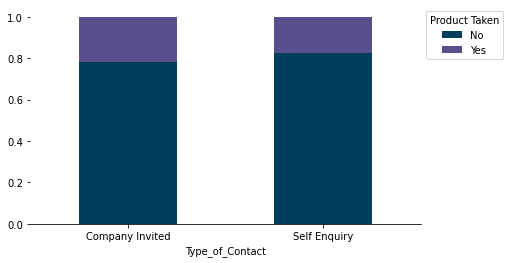

Prod_Taken     0    1   All
City_Tier                  
1           2670  520  3190
2            152   46   198
3           1146  354  1500
All         3968  920  4888
--------------------------------------------------


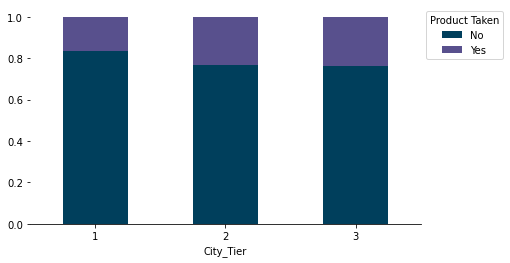

Prod_Taken         0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
--------------------------------------------------


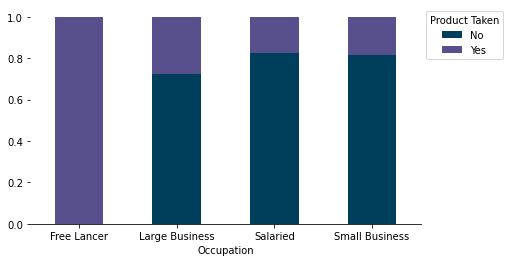

Prod_Taken     0    1   All
Gender                     
Female      1630  342  1972
Male        2338  578  2916
All         3968  920  4888
--------------------------------------------------


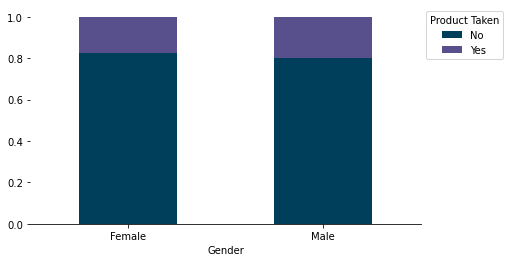

Prod_Taken                    0    1   All
Number_Of_Person_Visiting                 
1                            39    0    39
2                          1151  267  1418
3                          1942  460  2402
4                           833  193  1026
5                             3    0     3
All                        3968  920  4888
--------------------------------------------------


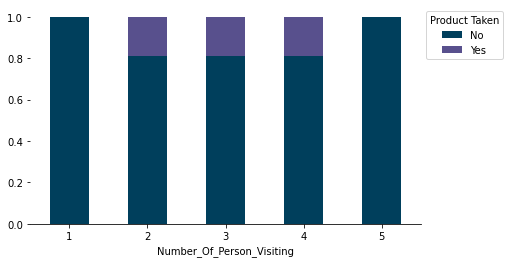

Prod_Taken          0    1   All
Product_Pitched                 
Basic            1290  552  1842
Deluxe           1528  204  1732
King              210   20   230
Standard          618  124   742
Super Deluxe      322   20   342
All              3968  920  4888
--------------------------------------------------


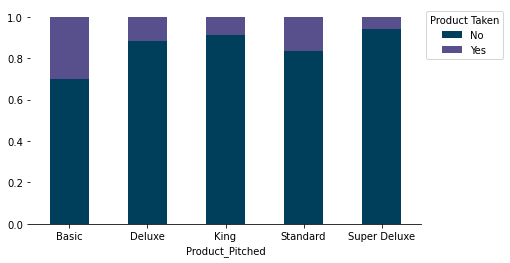

Prod_Taken                  0    1   All
Preferred_Property_Star                 
3.0                      2531  488  3019
4.0                       731  182   913
5.0                       706  250   956
All                      3968  920  4888
--------------------------------------------------


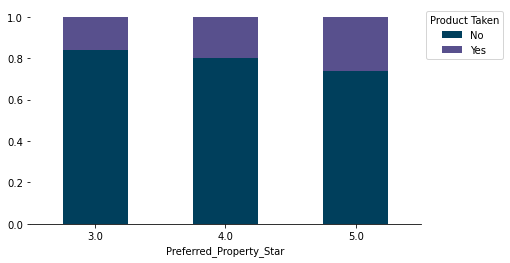

Prod_Taken          0    1   All
Number_Of_Trips                 
1.0               508  112   620
2.0              1186  305  1491
3.0               969  223  1192
4.0               417   61   478
5.0               396   62   458
6.0               258   64   322
7.0               156   62   218
8.0                76   29   105
19.0                0    1     1
20.0                0    1     1
21.0                1    0     1
22.0                1    0     1
All              3968  920  4888
--------------------------------------------------


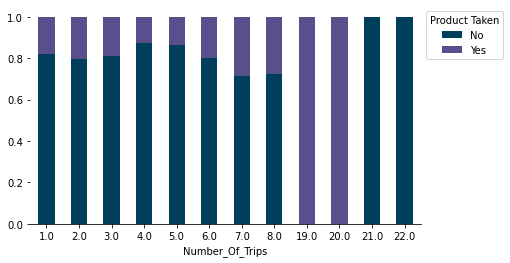

Prod_Taken         0    1   All
Marital_Status                 
Divorced         826  124   950
Married         2014  326  2340
Single           612  304   916
Unmarried        516  166   682
All             3968  920  4888
--------------------------------------------------


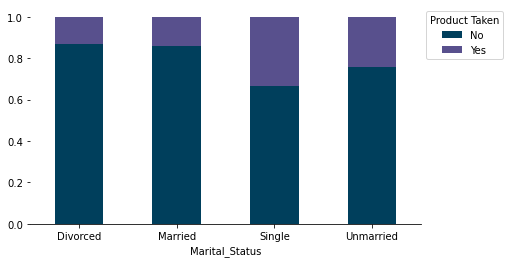

Prod_Taken     0    1   All
Passport                   
0           3040  426  3466
1            928  494  1422
All         3968  920  4888
--------------------------------------------------


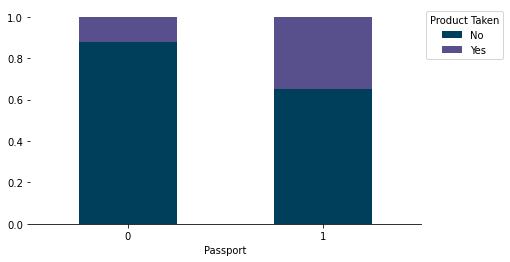

Prod_Taken     0    1   All
Own_Car                    
0           1496  360  1856
1           2472  560  3032
All         3968  920  4888
--------------------------------------------------


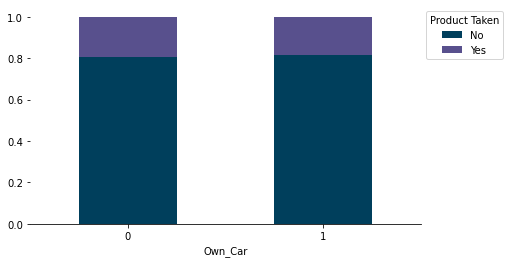

Prod_Taken         0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
--------------------------------------------------


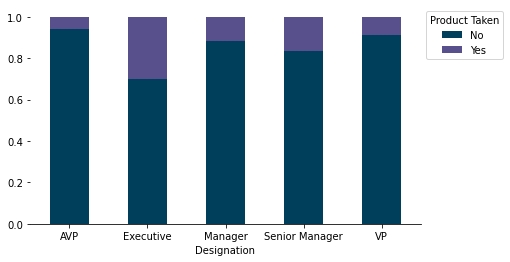

Prod_Taken     0    1   All
Age_bin                    
15-25        204  143   347
25-30        765  260  1025
30-40       1610  284  1894
40-50        929  144  1073
50-70        460   89   549
All         3968  920  4888
--------------------------------------------------


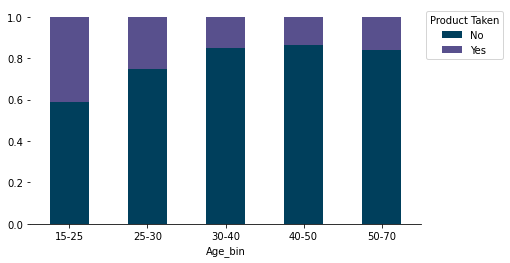

Prod_Taken     0    1   All
Income_bin                 
0-15k          2    0     2
15k-20k      754  284  1038
20k-25k     2031  459  2490
25k-30k      651  117   768
30k-35k      343   39   382
35k-40k      185   21   206
50k-100k       2    0     2
All         3968  920  4888
--------------------------------------------------


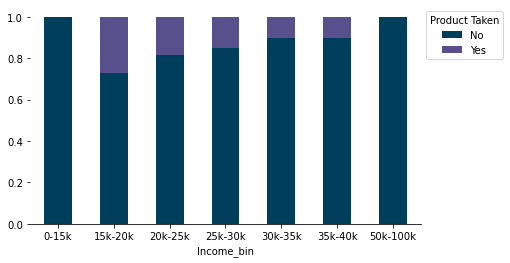

Prod_Taken                   0    1   All
Pitch_Satisfaction_Score                 
1                          798  144   942
2                          498   88   586
3                         1162  316  1478
4                          750  162   912
5                          760  210   970
All                       3968  920  4888
--------------------------------------------------


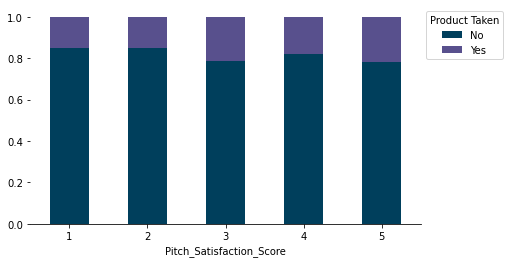

Prod_Taken                      0    1   All
Number_Of_Children_Visiting                 
0.0                           939  209  1148
1.0                          1688  392  2080
2.0                          1082  253  1335
3.0                           259   66   325
All                          3968  920  4888
--------------------------------------------------


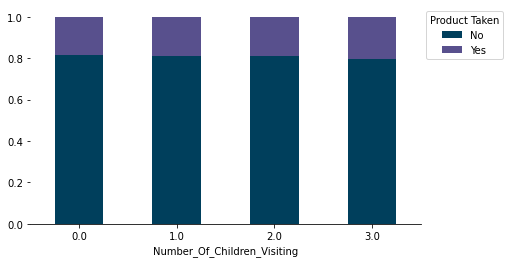

Prod_Taken              0    1   All
Number_Of_Followups                 
1.0                   156   20   176
2.0                   205   24   229
3.0                  1222  244  1466
4.0                  1726  387  2113
5.0                   577  191   768
6.0                    82   54   136
All                  3968  920  4888
--------------------------------------------------


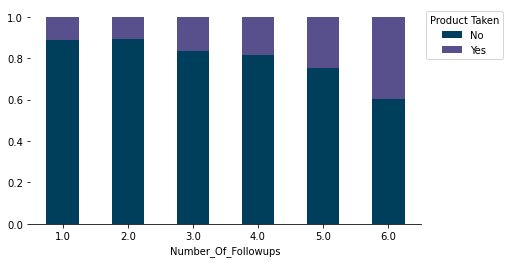

In [93]:
list_columns=['Type_of_Contact','City_Tier','Occupation','Gender','Number_Of_Person_Visiting',
              'Product_Pitched','Preferred_Property_Star','Number_Of_Trips','Marital_Status','Passport',
              'Own_Car','Designation','Age_bin','Income_bin','Pitch_Satisfaction_Score','Number_Of_Children_Visiting','Number_Of_Followups']

for item in list_columns:
    stacked_plot(df1[item])

In [94]:
# Customer profile according to product pitched and product purchased ------------------------------

# Basic package: Most of the customer have Monthly income < 25000, Age is in range of 25-30, 
#                Designation as Executive belong to City tier 1, are salaried and single males . Customer contacted the company.

# Deluxe package: Most of the customer have Monthly income < 25000, Age is in range of 30-40, 
#                 Designation as Managers belong to city tier 3 and occupation is small business and married .
#                 Customer contacted the company. City tier 1 and divorced customers also preferred this package

# King : Most of the customer have Monthly income in range of 30k-35k, age range in 50-70, Designation as VP. 
#        Belong to city tier 1 and are single female and Occupation is small business.Females buy this package more than men.

# SuperDeluxe: Most of the customer have Monthly income 30k-35k, Age is in range 40-50, Designation as AVP, 
#              belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them were company invited.

# Standard package: Most of the customer have Monthly income 25k-30k,Age is in range of 30-40 , Designation as Senior Manager, 
#                   is married, male , from tier city 3,and occupation is small business. majority of them had self inquired.

In [95]:
# Insights based on EDA --------------------------------------------------------------------------------------------


# Mostly customer visting with 2,3,4 travellers purchased the product.

# Customers who were pitched basic package mostly brought the product , followed by standard. 
# Reason might be its less expensive.

# Mostly Customers who had passport bought the product.

# Most of the customers who bought the product were Executive and Senior manager

# Customers who were followed up 4-6 times had purchases the product

# Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier 2,3.

# Customer from 18-25 age purchased the product taken, followed by 25-30.

# Customers who earn from 15k-20k purchased product followed by customers in income range 20k-25k.

# Free Lancers(need more data to conclude) and Large Business owners have higher chance of purchasing the travel package

# Single and unmarried people has higher chance of purchasing the travel package.

# Having a passport increased chances of purchasing the package.

# Customers who took 7/8 trips had higher chances of purchasing the packages

# Gender,number of children visiting, having a car seemed to be insignificant.

# Customers mostly purchased the travel package when marketing team did high number of followups,
# higher duration of pitch , and pitched Basic product.

## Outlier handling

In [96]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

df_clean = df1[~((df1.select_dtypes(['int64', 'float64'])<lower) | 
                 (df1.select_dtypes(['int64', 'float64'])>upper)).any(axis=1)]

In [97]:
df_clean.describe()

,Age,Duration_Of_Pitch,Number_Of_Person_Visiting,Number_Of_Followups,Preferred_Property_Star,Number_Of_Trips,Pitch_Satisfaction_Score,Number_Of_Children_Visiting,Monthly_Income
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,36.458778,15.040477,2.877576,3.723616,3.583064,3.087410,3.075739,1.156444,22492.483362
std,8.843855,7.495493,0.724397,0.785389,0.796004,1.635822,1.359946,0.853304,3759.730898
min,18.000000,5.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,16009.000000
25%,30.000000,9.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,20209.500000
50%,35.000000,14.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,21825.000000
75%,42.000000,18.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,24533.000000
max,61.000000,34.000000,4.000000,5.000000,5.000000,7.000000,5.000000,3.000000,32875.000000


In [100]:
# Function plots 2 boxplots (before and after outlier removal) --------------------------------------------

def box_box(data, data_clean):
    
    Name = data.name.upper()
    
    fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw = {"height_ratios": (.5, .5)}, figsize=(12, 8))
    
    
    
    fig1.suptitle('SPREAD OF DATA FOR ' + Name, fontsize=18, fontweight='bold')
    
    sns.boxplot(x=data, ax=ax1, showmeans=True, color='teal', orient='h')
    ax1.set(xlabel='')
    
    sns.boxplot(x=data_clean, ax=ax2, showmeans=True, color='orange', orient='h')
    sns.despine(top=True, right=True, left=True)

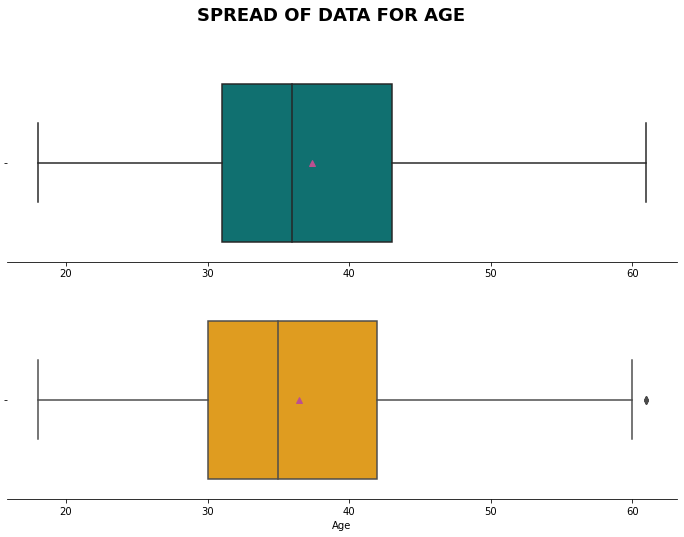

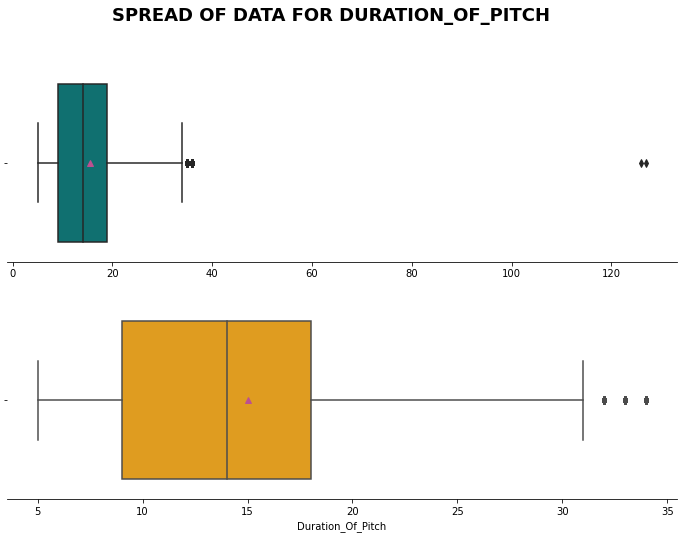

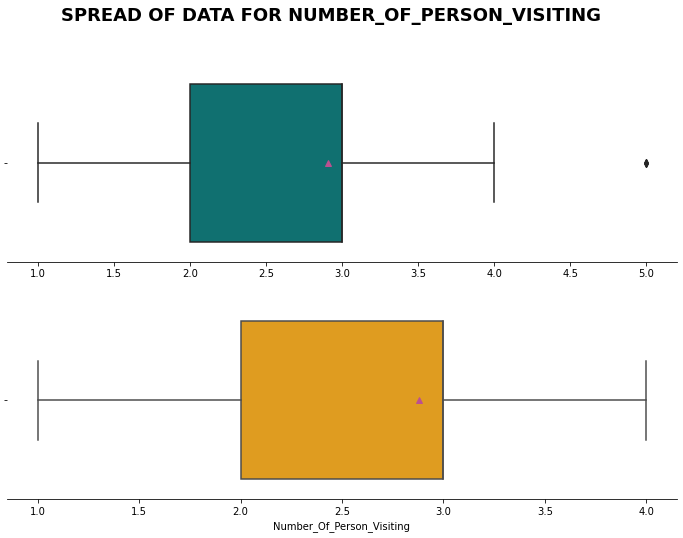

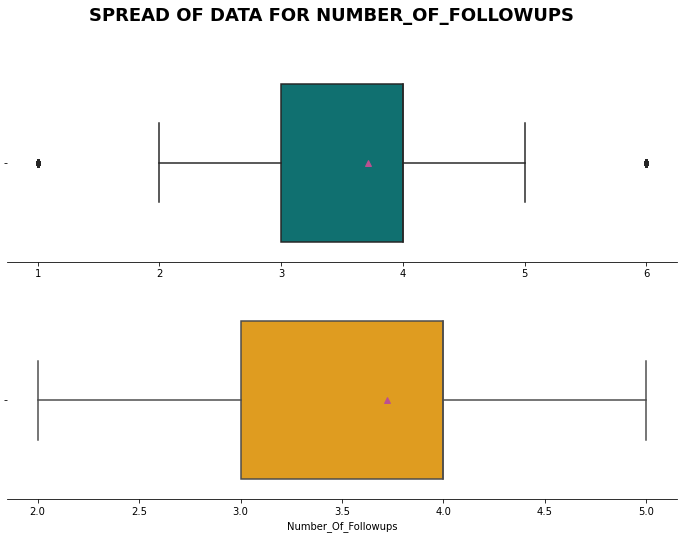

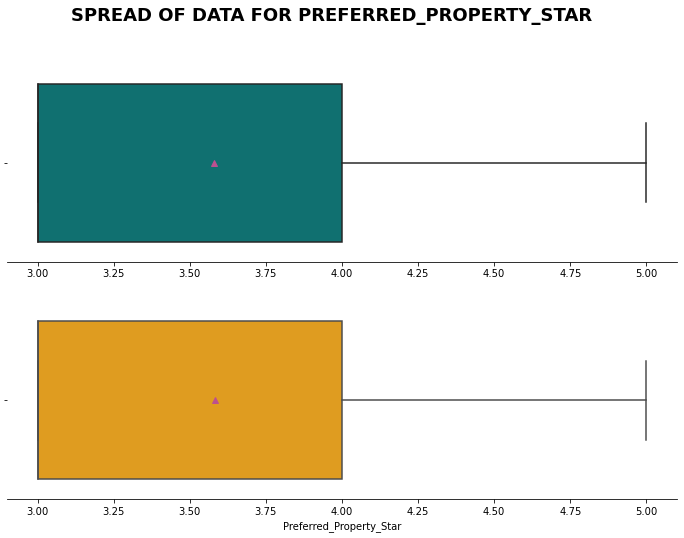

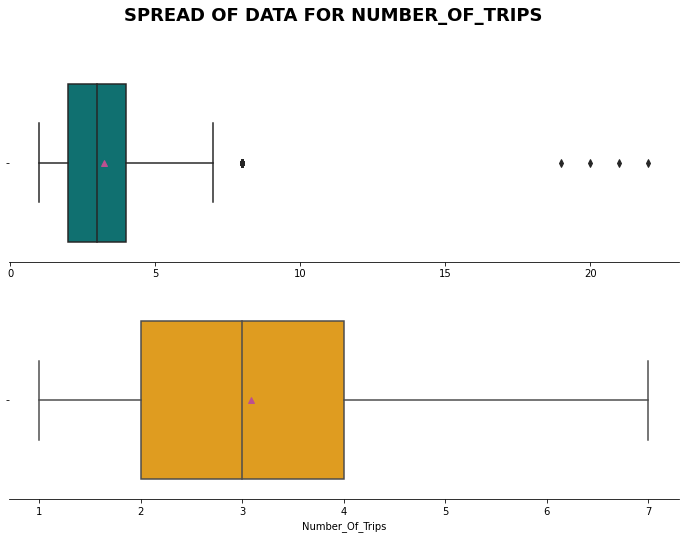

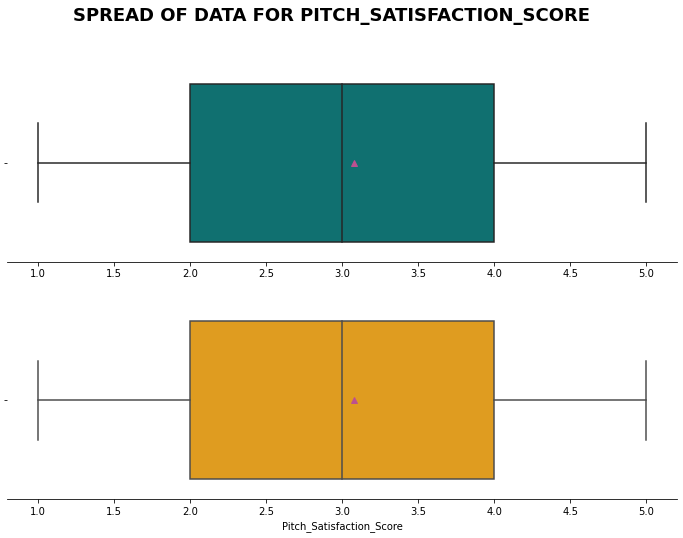

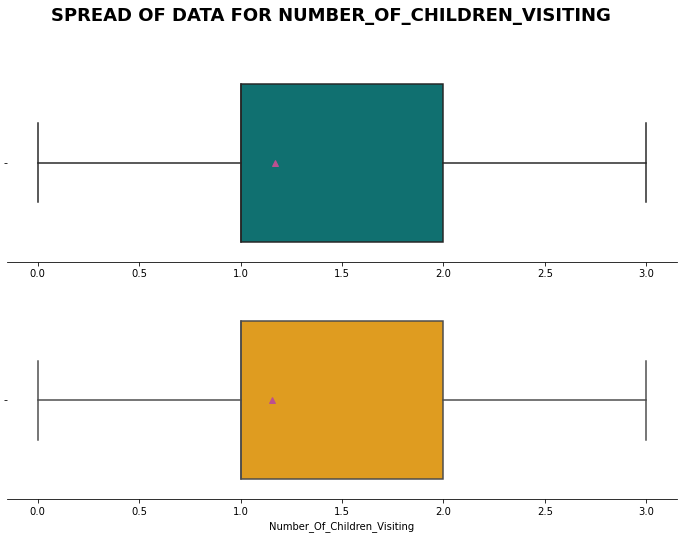

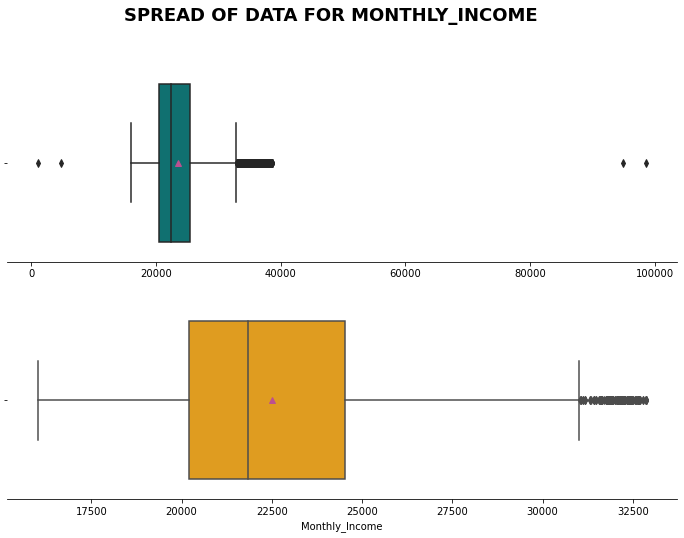

In [101]:
for x in num_cols:
    box_box(df1[x], df_clean[x])